# Final Project DSEM

#### DataScience on C02 Emissions data

<left>
<img src="../reports/figures/co2_emissions.jpg" width="400" />
</left>

At the start of our project, we ambitiously uploaded a wide array of datasets—deforestation, GDP, temperature anomalies, precipitation, drought impacts, population, land use, and more—hoping to uncover the intricate web of factors driving CO₂ emissions. However, after rigorous correlation analysis, it became clear that most datasets had weak or negligible relationships with emissions. Surprisingly, the strongest correlations emerged between deforestation, GDP, and land usage data, highlighting their combined impact on emission trends. This realization helped us refine our focus, transitioning from a broad exploration to a targeted analysis of these key drivers to better understand their influence on CO₂ emissions and develop actionable insights.

### Ingesting the data and getting the first look of the dataset

In [7]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox, t, ks_2samp
import pymc as pm
import arviz as az

##### Reading C02 emission dataset 

In [8]:
co2_emission_data = pd.read_csv("../data/raw/owid-co2-data.csv")
co2_emission_data

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


##### Reading deforestation dataset 

In [9]:
deforestation_data = pd.read_csv("../data/raw/annual-deforestation.csv")
deforestation_data

,Entity,Code,Year,Deforestation
0,Africa,NaN,1990,4096000.0
1,Africa,NaN,2000,4314000.0
2,Africa,NaN,2010,4444000.0
3,Africa,NaN,2015,4414000.0
4,Algeria,DZA,1990,14800.0
...,...,...,...,...
490,Zambia,ZMB,2015,189710.0
491,Zimbabwe,ZWE,1990,46070.0
492,Zimbabwe,ZWE,2000,46070.0
493,Zimbabwe,ZWE,2010,46070.0


##### Reading Annual Temperature dataset 

In [10]:
Temperature_data = pd.read_csv("../data/raw/annual-temperature-anomalies.csv")
Temperature_data.head(5)

,Entity,Code,Year,Temperature anomaly
0,Afghanistan,AFG,1940,-1.202316
1,Afghanistan,AFG,1941,0.794745
2,Afghanistan,AFG,1942,0.355437
3,Afghanistan,AFG,1943,-1.005242
4,Afghanistan,AFG,1944,-0.386346


##### Reading Average Percipitation per year across countries

In [11]:
Percipitation_data = pd.read_csv("../data/raw/average-precipitation-per-year.csv")
Percipitation_data.head(5)

,Entity,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


##### Reading CO2 emissions by land and fossil usage 

In [12]:
co2_fossil_land_data = pd.read_csv("../data/raw/co2-fossil-plus-land-use.csv")
co2_fossil_land_data.head(5)

,Entity,Code,Year,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change,Annual CO₂ emissions
0,Afghanistan,AFG,1949,6249831.5,6235175.5,14656.0
1,Afghanistan,AFG,1950,7316018.5,7231746.5,84272.0
2,Afghanistan,AFG,1951,8263895.0,8172295.0,91600.0
3,Afghanistan,AFG,1952,9192133.0,9100533.0,91600.0
4,Afghanistan,AFG,1953,10268653.0,10162397.0,106256.0


##### Reading drought dataset

In [13]:
drought_data = pd.read_csv("../data/raw/Drought affected annual number.csv")
drought_data.head(5)


,Drought affected,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,2580037,0,0,0,0,0,1900000,0,280000
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
3,Angola,0,0,0,0,0,0,0,0,0,...,0,0,58,0,0,25000,0,0,0,0
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Reading GDP File

In [14]:
GDP_data = pd.read_csv("../data/raw/GDP By Country.csv")
GDP_data.head(5)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


##### Reading Land usage dataset

In [15]:
land_usage_data = pd.read_csv("../data/raw/land-use-over-the-long-term.csv")
land_usage_data.head(5)

,Entity,Code,Year,Land use: Built-up area,Land use: Grazingland,Land use: Cropland
0,Afghanistan,AFG,-10000,0.000000e+00,0.0,0.000
1,Afghanistan,AFG,-9000,3.608851e-13,0.0,0.000
2,Afghanistan,AFG,-8000,1.499061e-12,0.0,0.000
3,Afghanistan,AFG,-7000,6.226869e-12,0.0,0.000
4,Afghanistan,AFG,-6000,2.586546e-11,0.0,39494.934


##### Reading Population Dataset

In [16]:
population_data = pd.read_csv("../data/raw/population.csv")
population_data[population_data['LOCATION'] == 'AUS']

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POP,TOT,AGRWTH,A,1957,2.270316,NaN
1,AUS,POP,TOT,AGRWTH,A,1958,2.095436,NaN
2,AUS,POP,TOT,AGRWTH,A,1959,2.174355,NaN
3,AUS,POP,TOT,AGRWTH,A,1960,2.177804,NaN
4,AUS,POP,TOT,AGRWTH,A,1961,2.269586,NaN
...,...,...,...,...,...,...,...,...
230,AUS,POP,WOMEN,MLN_PER,A,2010,11.064000,NaN
231,AUS,POP,WOMEN,MLN_PER,A,2011,11.222000,NaN
232,AUS,POP,WOMEN,MLN_PER,A,2012,11.415000,NaN
233,AUS,POP,WOMEN,MLN_PER,A,2013,11.614000,NaN


##### Reading per capita co2 emission sector wise

In [17]:
co2_sector_data = pd.read_csv("../data/raw/per-capita-co2-sector.csv")
co2_sector_data

,Entity,Code,Year,Per capita carbon dioxide emissions from buildings,Per capita carbon dioxide emissions from electricity and heat,Per capita fugitive emissions of carbon dioxide from energy production,Per capita carbon dioxide emissions from industry,Per capita carbon dioxide emissions from bunker fuels,Per capita carbon dioxide emissions from land use change and forestry,Per capita carbon dioxide emissions from transport,Per capita carbon dioxide emissions from manufacturing and construction,Per capita carbon dioxide emissions from other fuel combustion
0,Afghanistan,AFG,1990,0.010792,0.026566,NaN,0.004151,0.001660,-0.198412,0.080527,0.047320,0.000000
1,Afghanistan,AFG,1991,0.011439,0.024512,NaN,0.004085,0.001634,-0.195279,0.075987,0.043305,0.000000
2,Afghanistan,AFG,1992,0.011296,0.015061,NaN,0.003765,0.001506,-0.179984,0.055727,0.029370,0.000000
3,Afghanistan,AFG,1993,0.010707,0.013384,NaN,0.003346,0.001338,-0.159939,0.049521,0.025430,0.000000
4,Afghanistan,AFG,1994,0.009846,0.011692,NaN,0.003077,0.001231,-0.147070,0.044921,0.022153,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,0.072236,0.344304,NaN,0.031730,0.008776,5.884226,0.135021,0.083713,0.016878
6556,Zimbabwe,ZWE,2018,0.068509,0.359175,NaN,0.037248,0.010642,5.797350,0.174266,0.102431,0.021284
6557,Zimbabwe,ZWE,2019,0.058279,0.326755,NaN,0.030777,0.010477,5.707409,0.146680,0.105426,0.018335
6558,Zimbabwe,ZWE,2020,0.062472,0.247313,NaN,0.032202,0.003864,5.613488,0.097251,0.090166,0.021897


In [18]:
exclude_countries = pd.read_csv("../data/raw/refined_countries.csv")
exclude_countries

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
213,Vietnam
214,Wallis and Futuna
215,Yemen
216,Zambia


#### Pivoting the required datasets to get consistent granularity across datasets

In [19]:
drought_data_pivoted = drought_data.melt(id_vars=["Drought affected"], 
                      var_name="Year", 
                      value_name="Value")
print(drought_data_pivoted[drought_data_pivoted["Value"]>0].head(100))

     Drought affected  Year     Value
14           Botswana  1970     87600
15             Brazil  1970  10000000
148          Cameroon  1971    400000
175             Ghana  1971     12000
194             Kenya  1971    150000
...               ...   ...       ...
2378       Madagascar  1988    950200
2394            Niger  1988   1000000
2410          Somalia  1988     53500
2411     South Africa  1988   1320000
2413        Sri Lanka  1988    806000

[100 rows x 3 columns]


In [20]:
GDP_data_pivoted = GDP_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)
GDP_data_pivoted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,537777811.1
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
15571,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2018,NaN
15572,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2018,NaN
15573,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2018,NaN
15574,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2018,NaN


#### Creating a master cohort to join all the columns to get a master table

In [21]:
# Concatenate the selected columns from the CO2 emission dataset
Master_Cohort = co2_emission_data[['country', 'year', 'iso_code']].copy()

# Convert 'year' to numeric, filter by range, sort, and remove duplicates
Master_Cohort = Master_Cohort.assign(
    year=pd.to_numeric(Master_Cohort['year'], errors='coerce')
).query("1980 <= year <= 2018").sort_values(['country', 'year']).drop_duplicates()

# Filter countries based on the exclude list
exclude_countries_list = exclude_countries['Country'].tolist()
Master_Cohort = Master_Cohort[Master_Cohort['country'].isin(exclude_countries_list)]

# Reset the index for cleaner output and display the result
Master_Cohort.reset_index(drop=True, inplace=True)
print(Master_Cohort)


          country  year iso_code
0     Afghanistan  1980      AFG
1     Afghanistan  1981      AFG
2     Afghanistan  1982      AFG
3     Afghanistan  1983      AFG
4     Afghanistan  1984      AFG
...           ...   ...      ...
8497     Zimbabwe  2014      ZWE
8498     Zimbabwe  2015      ZWE
8499     Zimbabwe  2016      ZWE
8500     Zimbabwe  2017      ZWE
8501     Zimbabwe  2018      ZWE

[8502 rows x 3 columns]


#### Merging all the datasets

In [22]:
# Merge datasets sequentially with necessary renaming
Master_Cohort_final = (
    Master_Cohort
    .merge(
        deforestation_data.rename(columns={'Entity': 'country', 'Year': 'year'}), 
        on=['country', 'year'], how='left'
    )
    .merge(
        co2_emission_data, 
        on=['country', 'year', 'iso_code'], how='left'
    )
    .merge(
        Temperature_data.rename(columns={'Entity': 'country', 'Year': 'year'}), 
        on=['country', 'year'], how='left'
    )
    .merge(
        Percipitation_data.rename(columns={'Entity': 'country', 'Year': 'year'}), 
        on=['country', 'year'], how='left'
    )
    .drop(columns=['Code_x', 'Code_y'], errors='ignore')
    .merge(
        co2_fossil_land_data.rename(columns={'Entity': 'country', 'Year': 'year'}), 
        on=['country', 'year'], how='left'
    )
    .drop(columns=['Code_x', 'Code_y'], errors='ignore')
    .merge(
        drought_data_pivoted.rename(columns={'Drought affected': 'country'}).assign(year=lambda df: df['Year'].astype(int)), 
        on=['country', 'year'], how='left'
    )
    .merge(
        GDP_data_pivoted.rename(columns={'Country Name': 'country'}).assign(year=lambda df: df['Year'].astype(int)), 
        on=['country', 'year'], how='left'
    )
    .rename(columns={'Value_x': 'drought_value', 'Value_y': 'GDP'})
    .merge(
        land_usage_data.rename(columns={'Entity': 'country', 'Year': 'year'}), 
        on=['country', 'year'], how='left'
    )
    .merge(
        co2_sector_data.rename(columns={'Entity': 'country', 'Year': 'year'}), 
        on=['country', 'year'], how='left'
    )
   
)
Master_Cohort_final

,country,year,iso_code,Deforestation,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,Code_y,Per capita carbon dioxide emissions from buildings,Per capita carbon dioxide emissions from electricity and heat,Per capita fugitive emissions of carbon dioxide from energy production,Per capita carbon dioxide emissions from industry,Per capita carbon dioxide emissions from bunker fuels,Per capita carbon dioxide emissions from land use change and forestry,Per capita carbon dioxide emissions from transport,Per capita carbon dioxide emissions from manufacturing and construction,Per capita carbon dioxide emissions from other fuel combustion
0,Afghanistan,1980,AFG,NaN,13169312.0,1.532984e+10,0.023,0.002,1.756,-0.476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,AFG,NaN,11937587.0,1.564534e+10,0.033,0.003,1.978,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,AFG,NaN,10991382.0,1.598041e+10,0.039,0.004,2.095,0.116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,AFG,NaN,10917986.0,1.675533e+10,0.006,0.001,2.520,0.425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,AFG,NaN,11190220.0,1.707215e+10,0.048,0.004,2.822,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,Zimbabwe,2014,ZWE,NaN,14207367.0,2.381884e+10,0.496,0.035,11.946,0.275,...,ZWE,0.012669,0.482848,NaN,0.035193,0.002112,0.796770,0.179484,0.073201,0.059124
8498,Zimbabwe,2015,ZWE,46070.0,14399009.0,2.424616e+10,0.585,0.041,12.017,0.071,...,ZWE,0.036808,0.475727,NaN,0.040975,0.004167,0.786165,0.162511,0.075700,0.052087
8499,Zimbabwe,2016,ZWE,NaN,14600297.0,2.436205e+10,0.461,0.032,10.581,-1.436,...,ZWE,0.071231,0.413005,NaN,0.031506,0.007534,5.969742,0.126025,0.084930,0.011644
8500,Zimbabwe,2017,ZWE,NaN,14812484.0,2.557601e+10,0.469,0.032,9.827,-0.754,...,ZWE,0.072236,0.344304,NaN,0.031730,0.008776,5.884226,0.135021,0.083713,0.016878


##### Reflection on the Merge Process

After the merge and inspecting the dataset, things became overly complicated or we were just overwhelmed running out of time. 
At that moment, we realized having an extra team member would have been helpful. 
However, we reminded ourselves of the professor's advice:

> "When things are too complicated, start small and then build on it."

<center>
<img src="ipynb.images/Prof.jpeg" width="250" />
</center>


So we proceeded with filtering the dataset with metrics that we felt is important


In [23]:
# Replace spaces with underscores in column names
Master_Cohort_final.columns = Master_Cohort_final.columns.str.replace(' ', '_')

# Define columns to keep
columns_to_keep = [
    'country', 'year', 'Deforestation', 'Temperature_anomaly',
    'Annual_precipitation', 'co2',
    'Annual_CO₂_emissions_including_land-use_change',
    'Annual_CO₂_emissions_from_land-use_change', 'Annual_CO₂_emissions','population',
    'GDP', 'Per_capita_carbon_dioxide_emissions_from_buildings',
    'Per_capita_carbon_dioxide_emissions_from_electricity_and_heat',
    'Per_capita_carbon_dioxide_emissions_from_industry',
    'Per_capita_carbon_dioxide_emissions_from_bunker_fuels',
    'Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry',
    'Per_capita_carbon_dioxide_emissions_from_transport',
    'Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction',
    'Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion'
]

# Filter the DataFrame by year and selected columns
Master_filtered_df = Master_Cohort_final.query("1990 <= year <= 2015")[columns_to_keep]

Master_filtered_df


,country,year,Deforestation,Temperature_anomaly,Annual_precipitation,co2,Annual_CO₂_emissions_including_land-use_change,Annual_CO₂_emissions_from_land-use_change,Annual_CO₂_emissions,population,GDP,Per_capita_carbon_dioxide_emissions_from_buildings,Per_capita_carbon_dioxide_emissions_from_electricity_and_heat,Per_capita_carbon_dioxide_emissions_from_industry,Per_capita_carbon_dioxide_emissions_from_bunker_fuels,Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry,Per_capita_carbon_dioxide_emissions_from_transport,Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction,Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion
10,Afghanistan,1990,NaN,-0.307090,389.80063,2.024,2185065.80,160739.67,2024326.1,12045664.0,NaN,0.010792,0.026566,0.004151,0.001660,-0.198412,0.080527,0.047320,0.000000
11,Afghanistan,1991,NaN,-1.317577,522.01180,1.914,1915436.90,1135.84,1914301.0,12238879.0,NaN,0.011439,0.024512,0.004085,0.001634,-0.195279,0.075987,0.043305,0.000000
12,Afghanistan,1992,NaN,-1.542846,483.13354,1.482,-178580.75,-1660634.80,1482054.0,13278982.0,NaN,0.011296,0.015061,0.003765,0.001506,-0.179984,0.055727,0.029370,0.000000
13,Afghanistan,1993,NaN,-1.019332,352.79886,1.487,-2575150.50,-4062093.50,1486943.0,14943174.0,NaN,0.010707,0.013384,0.003346,0.001338,-0.159939,0.049521,0.025430,0.000000
14,Afghanistan,1994,NaN,-0.683894,375.86728,1.454,-1994471.20,-3448300.20,1453829.0,16250799.0,NaN,0.009846,0.011692,0.003077,0.001231,-0.147070,0.044921,0.022153,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,Zimbabwe,2011,NaN,-0.068437,708.95460,10.363,30813740.00,20450542.00,10363199.0,13595422.0,1.410192e+10,0.041190,0.658310,0.027951,0.002207,0.832633,0.165497,0.107389,0.122835
8495,Zimbabwe,2012,NaN,0.233033,604.32390,11.254,27603672.00,16349903.00,11253769.0,13817886.0,1.711485e+10,0.025329,0.403824,0.041251,0.002171,0.819228,0.184543,0.138950,0.091910
8496,Zimbabwe,2013,NaN,0.034166,791.48510,11.671,26675416.00,15004043.00,11671374.0,14013810.0,1.909102e+10,0.011417,0.485236,0.032825,0.002141,0.807775,0.202657,0.072785,0.064222
8497,Zimbabwe,2014,NaN,-0.102145,883.90760,11.946,25349208.00,13403059.00,11946148.0,14207367.0,1.949552e+10,0.012669,0.482848,0.035193,0.002112,0.796770,0.179484,0.073201,0.059124


### Preprocessing: Cleaning the dataset

> Function to visulise the Nulls and interpolate missing columns

In [24]:


# Function to visualize and handle null values
def visualize_nulls(df):
    # Get the count of null values for each column
    null_counts = df.isnull().sum()
    
    # Filter only columns with null values
    null_counts = null_counts[null_counts > 0]
    
    if null_counts.empty:
        print("No missing values in the dataset!")
        return df
    
    # Display null counts
    print("Columns with missing values:")
    print(null_counts)
    
    # Plot null values
    plt.figure(figsize=(12, 6))
    null_counts.plot(kind='bar')
    plt.title("Null Value Count by Column")
    plt.xlabel("Columns")
    plt.ylabel("Number of Null Values")
    plt.show()
    





> Function to interpolate the columns with lesser number of missing values

In [25]:
# List of columns excluding 'Deforestation'
columns_to_check = Master_filtered_df.columns.difference(['Deforestation'])

# Drop rows with NaN values in the selected columns
Master_filtered_df_cleaned = Master_filtered_df.dropna(subset=columns_to_check)
Master_filtered_df_cleaned = Master_filtered_df_cleaned.round(decimals=2)


# Display the shape or preview of the cleaned DataFrame
print(Master_filtered_df_cleaned.shape)
Master_filtered_df_cleaned.head()


(3625, 19)


,country,year,Deforestation,Temperature_anomaly,Annual_precipitation,co2,Annual_CO₂_emissions_including_land-use_change,Annual_CO₂_emissions_from_land-use_change,Annual_CO₂_emissions,population,GDP,Per_capita_carbon_dioxide_emissions_from_buildings,Per_capita_carbon_dioxide_emissions_from_electricity_and_heat,Per_capita_carbon_dioxide_emissions_from_industry,Per_capita_carbon_dioxide_emissions_from_bunker_fuels,Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry,Per_capita_carbon_dioxide_emissions_from_transport,Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction,Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion
22,Afghanistan,2002,NaN,0.52,304.83,1.34,6115077.5,4774082.50,1340995.0,21378123.0,4.055180e+09,0.01,0.01,0.0,0.0,0.01,0.02,0.03,0.0
23,Afghanistan,2003,NaN,-0.04,350.29,1.56,5924708.5,4365106.50,1559602.0,22733054.0,4.515559e+09,0.01,0.01,0.0,0.0,0.01,0.03,0.02,0.0
24,Afghanistan,2004,NaN,0.70,315.41,1.24,3352217.8,2114970.80,1237247.0,23560656.0,5.226779e+09,0.01,0.01,0.0,0.0,0.01,0.03,0.01,0.0
25,Afghanistan,2005,NaN,-0.56,374.58,1.89,2780482.0,890974.90,1889507.0,24404574.0,6.209138e+09,0.01,0.01,0.0,0.0,0.00,0.05,0.01,0.0
26,Afghanistan,2006,NaN,0.90,346.98,2.16,3128043.0,968724.94,2159318.0,25424100.0,6.971286e+09,0.01,0.01,0.0,0.0,0.00,0.06,0.01,0.0


In [26]:
def interpolation (df):
    df_interpolated = df.interpolate(method='linear', axis=0, limit_direction='both')
    
    return df_interpolated
    

Columns with missing values:
Deforestation    3287
dtype: int64


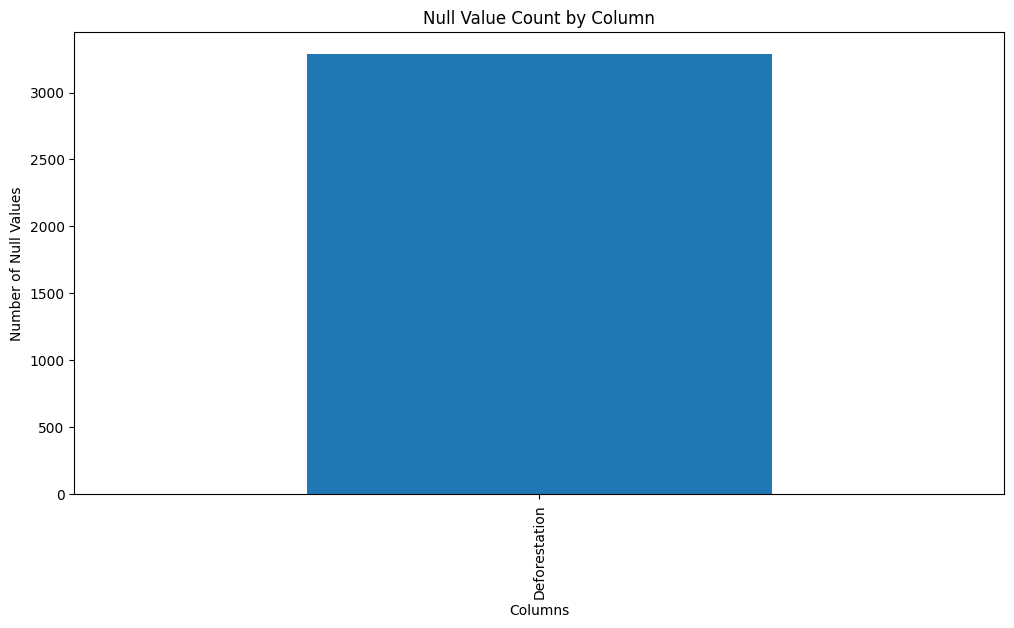

In [27]:
visualize_nulls(Master_filtered_df_cleaned)

In [28]:
Master_filtered_df_cleaned= interpolation(Master_filtered_df_cleaned)
Master_filtered_df_cleaned

/var/folders/ty/k_gmdb116y9ff4gcr9s0gvkc0000gn/T/ipykernel_74247/2579549956.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear', axis=0, limit_direction='both')


,country,year,Deforestation,Temperature_anomaly,Annual_precipitation,co2,Annual_CO₂_emissions_including_land-use_change,Annual_CO₂_emissions_from_land-use_change,Annual_CO₂_emissions,population,GDP,Per_capita_carbon_dioxide_emissions_from_buildings,Per_capita_carbon_dioxide_emissions_from_electricity_and_heat,Per_capita_carbon_dioxide_emissions_from_industry,Per_capita_carbon_dioxide_emissions_from_bunker_fuels,Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry,Per_capita_carbon_dioxide_emissions_from_transport,Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction,Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion
22,Afghanistan,2002,14800.0,0.52,304.83,1.34,6115077.5,4774082.50,1340995.0,21378123.0,4.055180e+09,0.01,0.01,0.00,0.0,0.01,0.02,0.03,0.00
23,Afghanistan,2003,14800.0,-0.04,350.29,1.56,5924708.5,4365106.50,1559602.0,22733054.0,4.515559e+09,0.01,0.01,0.00,0.0,0.01,0.03,0.02,0.00
24,Afghanistan,2004,14800.0,0.70,315.41,1.24,3352217.8,2114970.80,1237247.0,23560656.0,5.226779e+09,0.01,0.01,0.00,0.0,0.01,0.03,0.01,0.00
25,Afghanistan,2005,14800.0,-0.56,374.58,1.89,2780482.0,890974.90,1889507.0,24404574.0,6.209138e+09,0.01,0.01,0.00,0.0,0.00,0.05,0.01,0.00
26,Afghanistan,2006,14800.0,0.90,346.98,2.16,3128043.0,968724.94,2159318.0,25424100.0,6.971286e+09,0.01,0.01,0.00,0.0,0.00,0.06,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,Zimbabwe,2011,46070.0,-0.07,708.95,10.36,30813740.0,20450542.00,10363199.0,13595422.0,1.410192e+10,0.04,0.66,0.03,0.0,0.83,0.17,0.11,0.12
8495,Zimbabwe,2012,46070.0,0.23,604.32,11.25,27603672.0,16349903.00,11253769.0,13817886.0,1.711485e+10,0.03,0.40,0.04,0.0,0.82,0.18,0.14,0.09
8496,Zimbabwe,2013,46070.0,0.03,791.49,11.67,26675416.0,15004043.00,11671374.0,14013810.0,1.909102e+10,0.01,0.49,0.03,0.0,0.81,0.20,0.07,0.06
8497,Zimbabwe,2014,46070.0,-0.10,883.91,11.95,25349208.0,13403059.00,11946148.0,14207367.0,1.949552e+10,0.01,0.48,0.04,0.0,0.80,0.18,0.07,0.06


In [30]:
visualize_nulls(Master_filtered_df_cleaned)
Master_filtered_df_cleaned.to_csv("../data/processed/Master_filtered_df_cleaned.csv")

No missing values in the dataset!


#### Finally we had enough with cleaning the dataset, now we proceed with the EDA

# Exploratory Data Analysis

In [31]:
# Basic info about the dataset
print(Master_filtered_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3625 entries, 22 to 8498
Data columns (total 19 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   country                                                                  3625 non-null   object 
 1   year                                                                     3625 non-null   int64  
 2   Deforestation                                                            3625 non-null   float64
 3   Temperature_anomaly                                                      3625 non-null   float64
 4   Annual_precipitation                                                     3625 non-null   float64
 5   co2                                                                      3625 non-null   float64
 6   Annual_CO₂_emissions_including_land-use_change                           362

In [32]:
# Summary statistics for numerical columns
print(Master_filtered_df_cleaned.describe())

              year  Deforestation  Temperature_anomaly  Annual_precipitation  \
count  3625.000000   3.625000e+03          3625.000000           3625.000000   
mean   2002.956414   1.042772e+05            -0.094742           1197.221950   
std       7.413354   4.133459e+05             0.485107            854.059693   
min    1990.000000   0.000000e+00            -2.420000              7.590000   
25%    1997.000000   6.200000e+02            -0.360000            653.320000   
50%    2003.000000   9.763000e+03            -0.070000           1018.270000   
75%    2009.000000   4.940900e+04             0.190000           1592.760000   
max    2015.000000   5.129300e+06             2.030000           4909.410000   

               co2  Annual_CO₂_emissions_including_land-use_change  \
count  3625.000000                                    3.625000e+03   
mean    166.710516                                    2.070221e+08   
std     723.069128                                    7.655057e+08   

### A single function provided us with a wealth of insights. Below are our key takeaways (hypotheses) from the summary above.

##### ** High Variability Across Metrics**
- The large standard deviations in most CO₂-related metrics may indicate significant differences across countries and years.
- This variability could highlight the uneven progress in emissions reductions and varying levels of industrialization globally.

##### ** Outliers Dominate Global Emissions**
- The maximum values in total CO₂ emissions (9.99 billion tons) and annual emissions from land-use changes (2.8 billion tons) might suggest that a few large emitters dominate global emissions.
- These outliers could be driven by major industrialized nations or regions experiencing rapid deforestation.

##### ** Land-Use Change as Both a Source and a Sink**
- The negative values in land-use change emissions (as low as -130.69 million tons) may indicate regions acting as carbon sinks, such as forests undergoing reforestation. These regions could represent opportunities for global climate mitigation strategies.
- Conversely, large positive values (up to 2.8 billion tons) might highlight the urgent need to manage deforestation in areas like tropical rainforests.

##### ** Deforestation as a Major Driver**
- With a mean of ~103,279 hectares per year and a maximum of ~5.13 million hectares, deforestation might be a critical factor in annual CO₂ emissions.
- The scale of forest loss could underscore the need for policies promoting afforestation and sustainable land use.


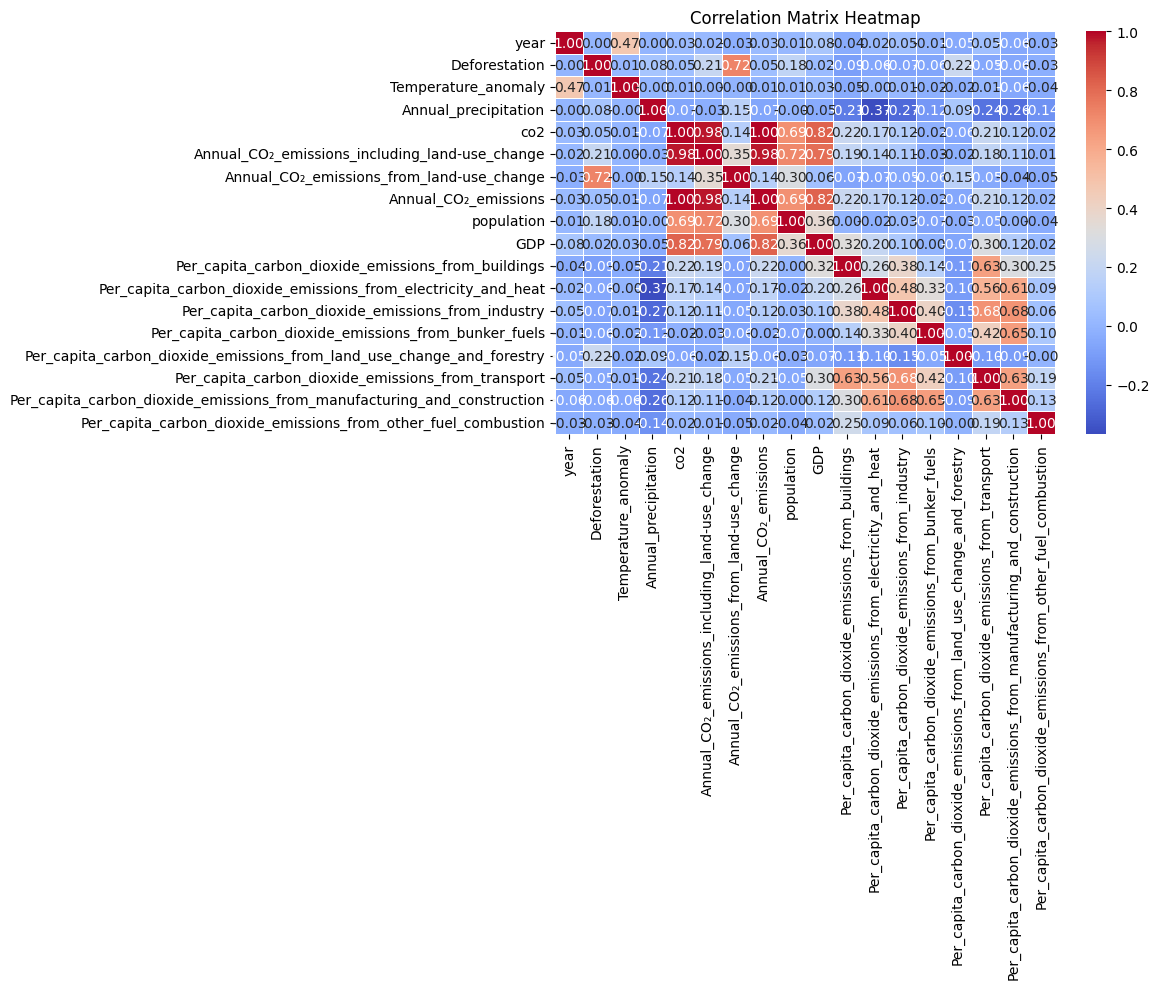

In [33]:
# Select numeric columns for correlation
numeric_columns = Master_filtered_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = Master_filtered_df_cleaned[numeric_columns].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

#### **Key Takeaways:**
- **Economic Activity as a Driver:**
  - GDP is a strong predictor of emissions in sectors like electricity, heat, and transport, highlighting the role of economic growth in increasing emissions.
  - Wealthier countries tend to exhibit higher per-capita emissions, emphasizing the disproportionate contribution of developed nations to global emissions.
  - The correlation between GDP and emissions underscores the need to decouple economic growth from carbon-intensive activities through investments in green technologies.

- **Deforestation and Land-Use Changes:**
  - These are closely linked to annual CO₂ emissions, with land-use changes acting as a significant contributor.
  - Temperature anomalies show a moderate inverse relationship with deforestation, possibly reflecting changes in vegetation and climate conditions in deforested areas.
  - Mitigating deforestation, especially in tropical regions, can provide significant reductions in CO₂ emissions while enhancing carbon sinks.

- **Sector-Specific Dynamics:**
  - The relationship between emissions and factors like population or GDP varies significantly across sectors, indicating that targeted interventions are needed for each.
  - Sectors like electricity and transport show a strong link to economic activity, while others, such as manufacturing and forestry, are influenced by localized practices.
  - Policies focusing on renewable energy adoption, efficient transportation systems, and sustainable manufacturing can address these sectoral disparities.

- **Opportunities for Mitigation:**
  - Land-use changes (e.g., afforestation) and improved transport and energy systems in high-GDP countries can significantly reduce emissions.
  - Policies targeting sector-specific interventions, especially in energy and land-use management, are critical to addressing emissions disparities globally.
  - International collaboration is essential to ensure equitable progress, particularly by supporting low-income countries in adopting sustainable practices and technologies.


### PLotting, Modeling , Predictions and deriving Insights

#### Basic way of deriving insights

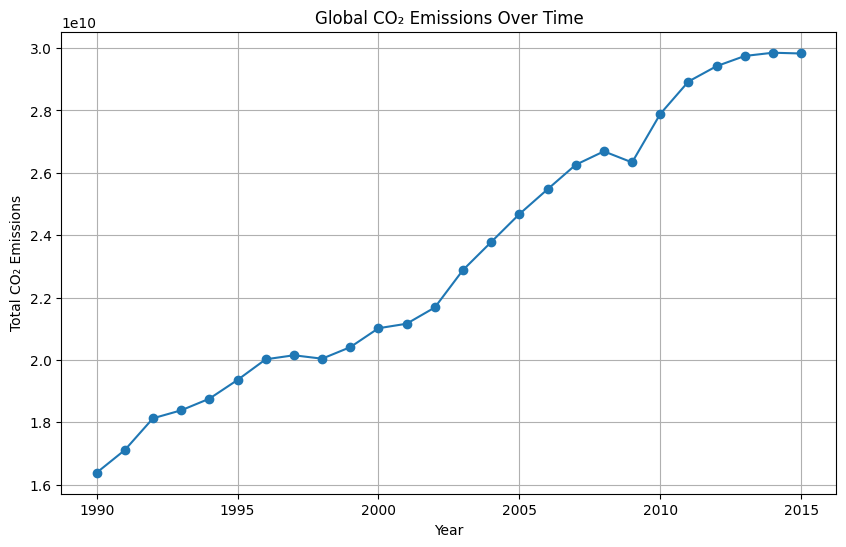

In [34]:
# Group by year and sum emissions globally
global_trend = Master_filtered_df_cleaned.groupby('year')['Annual_CO₂_emissions'].sum()

# Plot the global trend
global_trend.plot(kind='line', title='Global CO₂ Emissions Over Time', figsize=(10, 6), marker='o')
plt.ylabel('Total CO₂ Emissions')
plt.xlabel('Year')
plt.grid(True)
plt.show()


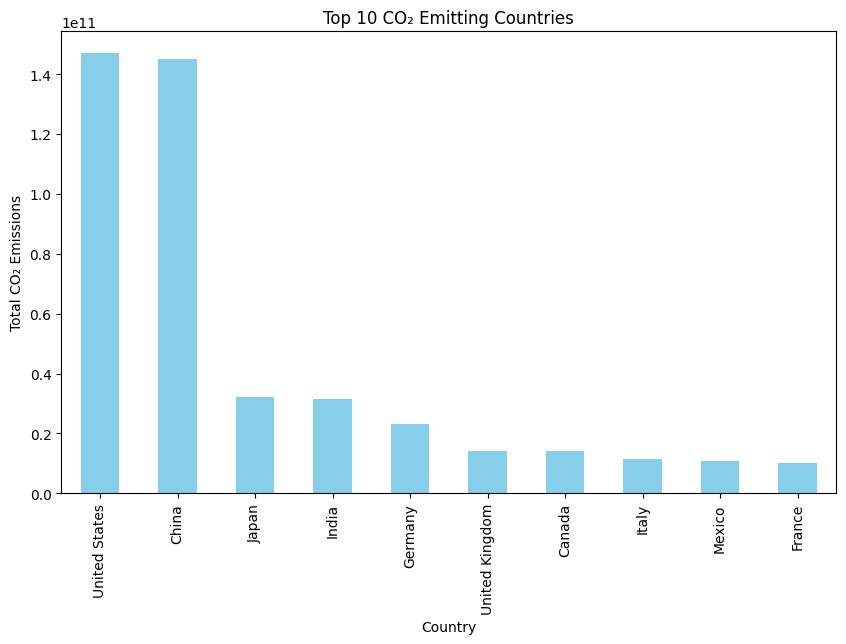

In [35]:
# Group by country and sum emissions across all years
country_emissions = Master_filtered_df_cleaned.groupby('country')['Annual_CO₂_emissions'].sum()

# Find the top 10 emitting countries
top_emitters = country_emissions.nlargest(10)
# Plot the top emitters
top_emitters.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Top 10 CO₂ Emitting Countries')
plt.ylabel('Total CO₂ Emissions')
plt.xlabel('Country')
plt.show()


Top 10 Countries with High Deforestation Intensity:
                    country  deforestation_intensity  Deforestation
4       Antigua and Barbuda                 0.545298   4.174766e+06
19                 Botswana                 0.513770   2.603882e+07
31                  Comoros                 0.404288   2.717260e+06
18   Bosnia and Herzegovina                 0.134283   3.917261e+07
131              Tajikistan                 0.089094   4.816080e+06
6                   Armenia                 0.066519   9.132000e+06
116   Sao Tome and Principe                 0.064104   8.864516e+03
95                  Namibia                 0.029641   3.675500e+06
45                 Eswatini                 0.023038   9.554895e+05
87               Mauritania                 0.018366   1.068925e+06


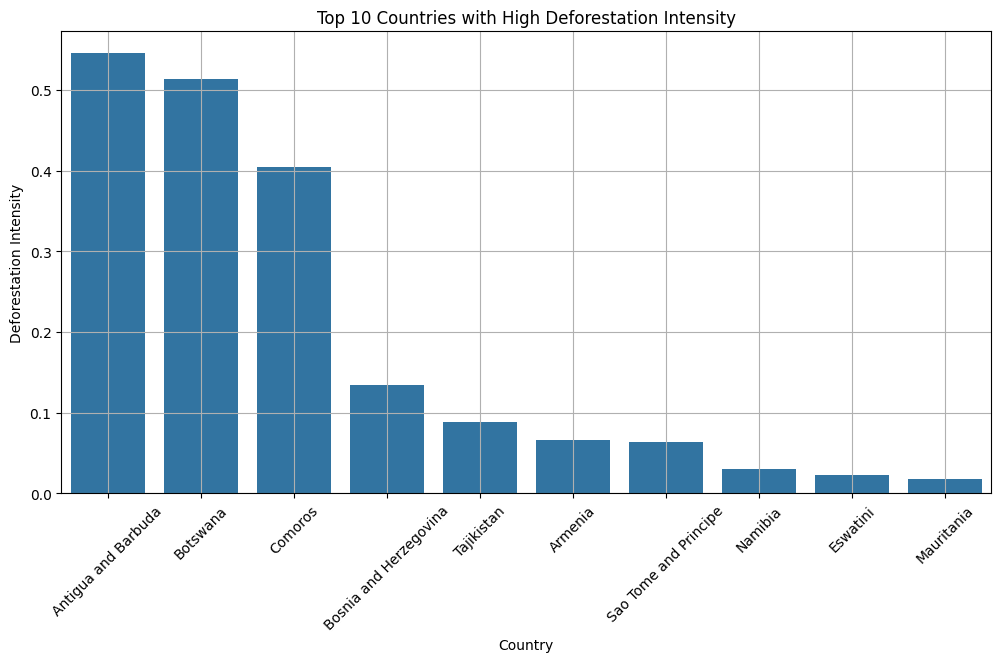

In [36]:
# Highlight countries contributing the most to deforestation intensity
Master_filtered_df_cleaned['deforestation_intensity'] = (
    Master_filtered_df_cleaned['Deforestation'] / Master_filtered_df_cleaned['Annual_CO₂_emissions_including_land-use_change']
)
high_intensity_countries = Master_filtered_df_cleaned.groupby('country').agg({
    'deforestation_intensity': 'mean',
    'Deforestation': 'sum'
}).reset_index().sort_values(by='deforestation_intensity', ascending=False).head(10)

print("Top 10 Countries with High Deforestation Intensity:")
print(high_intensity_countries)

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='deforestation_intensity', data=high_intensity_countries)
plt.title('Top 10 Countries with High Deforestation Intensity')
plt.xlabel('Country')
plt.ylabel('Deforestation Intensity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Plotting all the columns to see their distributions

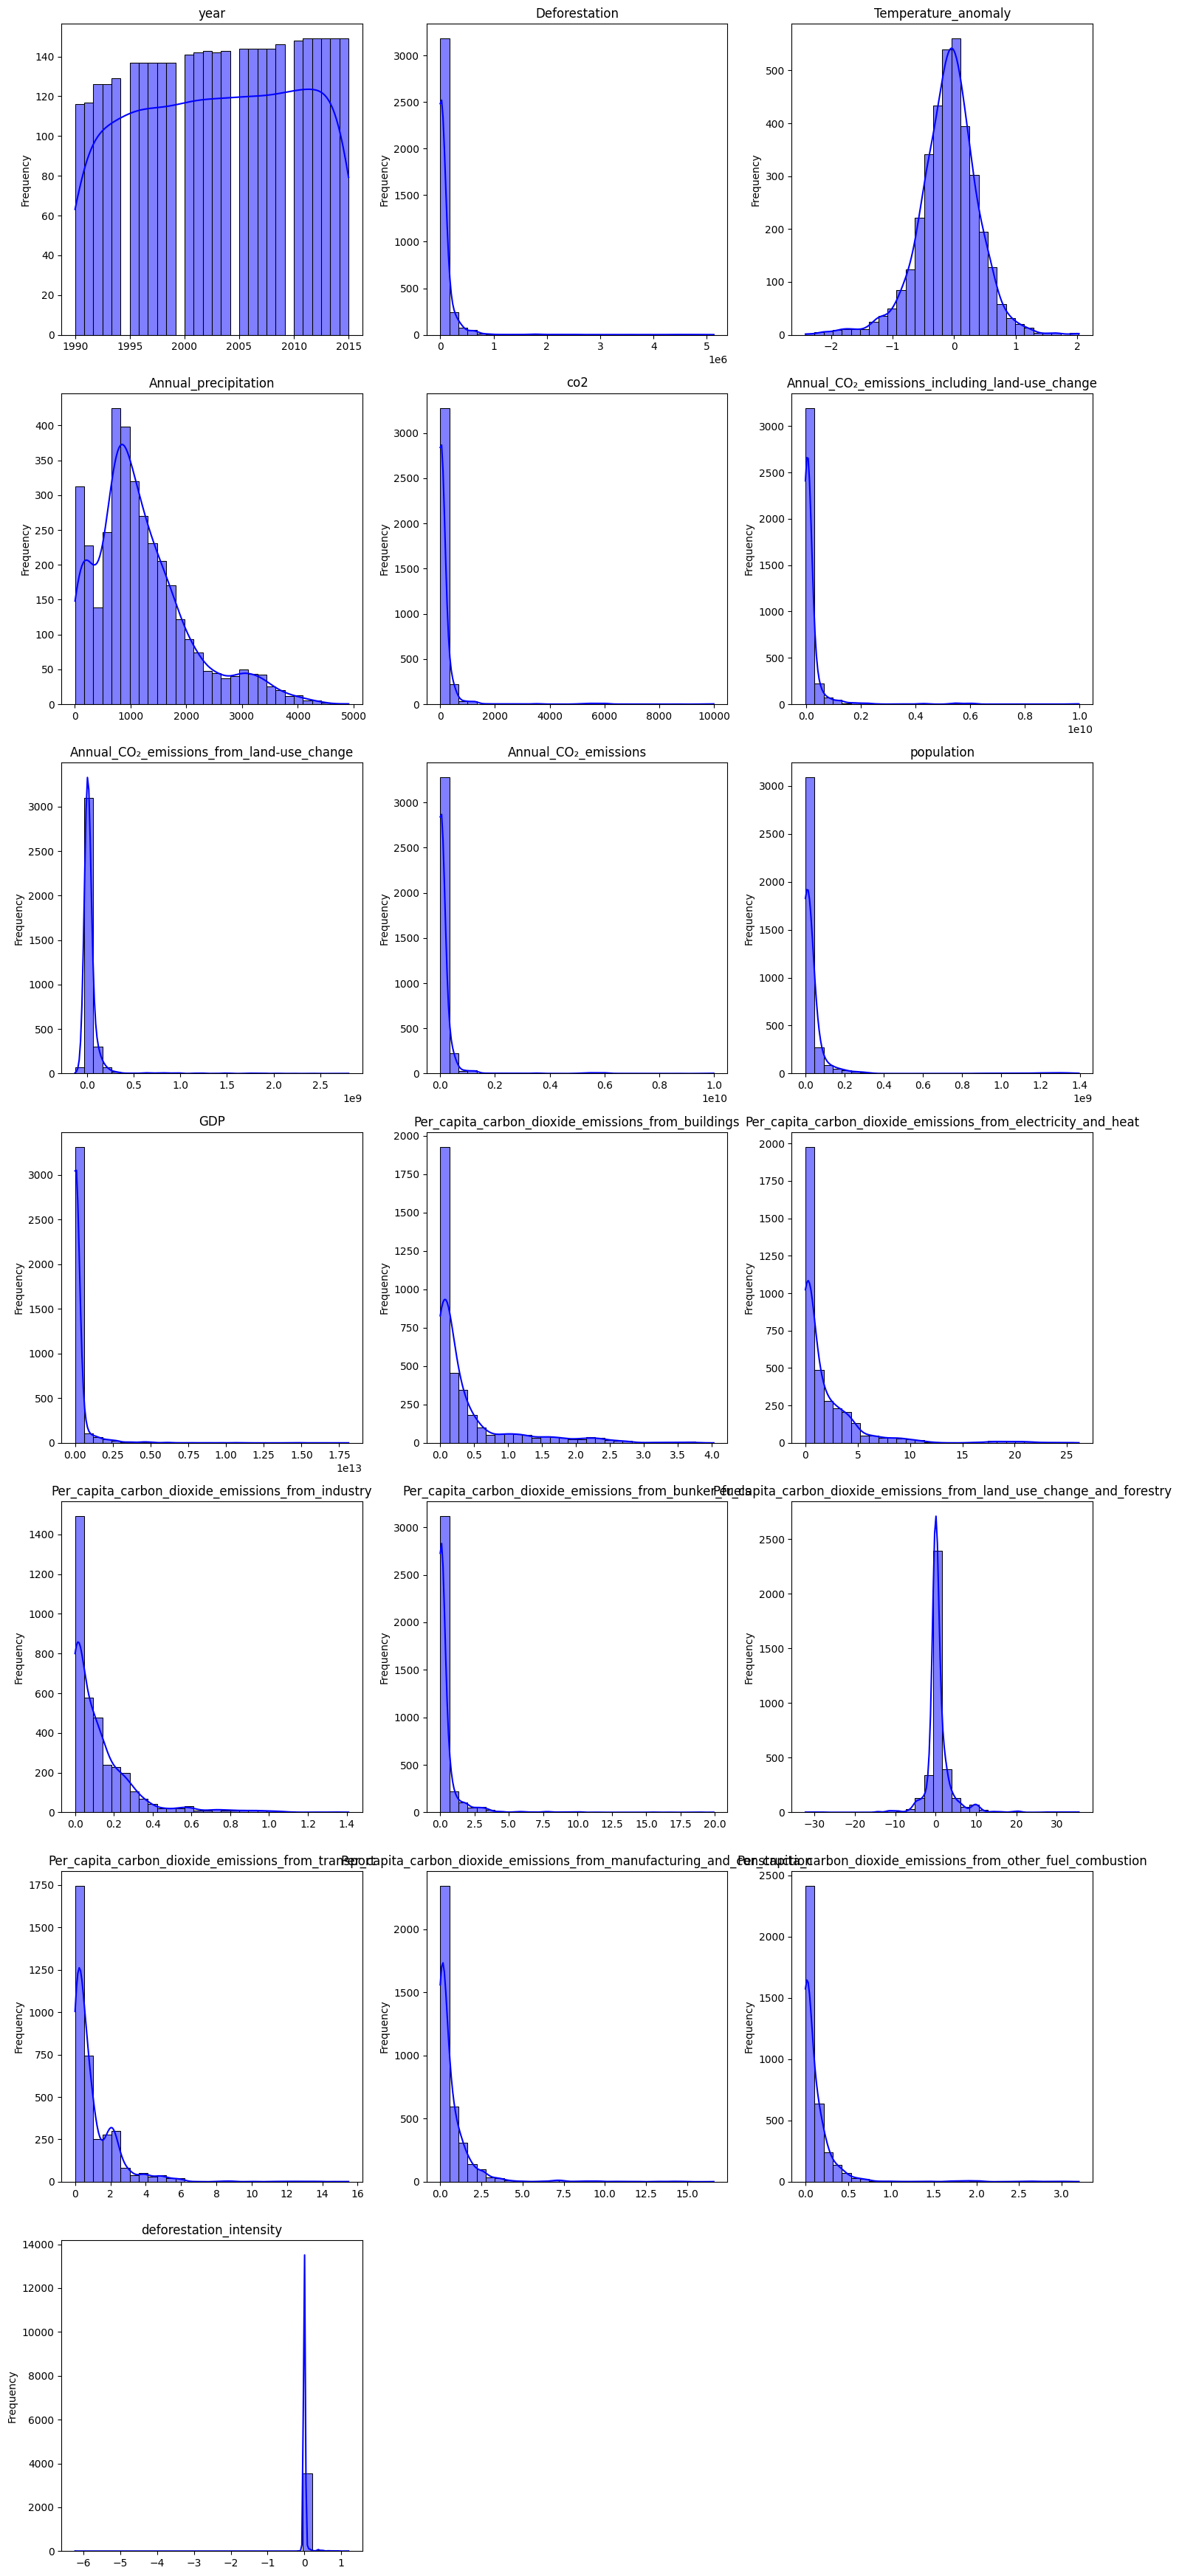

In [37]:


# Function to plot distributions in a grid layout
def plot_distributions_grid(df, n_cols=4):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    n_rows = -(-len(numeric_columns) // n_cols)  # Calculate rows needed for the grid

    plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size for better visibility
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue')
        plt.title(column, fontsize=12)
        plt.xlabel('')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_distributions_grid(Master_filtered_df_cleaned, n_cols=3)  # 3 charts per row


#### Summary of Distributions
 **Deforestation**
- Highly skewed to the right (long tail), with most values concentrated near zero.
- A few extreme cases suggest significant deforestation events in certain regions or years.

 **Temperature Anomaly**
- A symmetric, bell-shaped distribution centered around zero, indicating the presence of both warming and cooling trends relative to a baseline.

 **Annual Precipitation**
- Right-skewed distribution, with most regions receiving moderate levels of precipitation and a few experiencing extremely high levels.

 **CO₂ Emissions (Total and Sector-Specific)**
- All CO₂ metrics (e.g., total emissions, emissions from land-use change, per capita metrics) exhibit heavy right-skewness.
- Majority of observations report low emissions, with a small number of regions or years contributing disproportionately high values.

 **GDP**
- Strong right-skewness, highlighting disparities in economic output across countries.
- Most countries have relatively low GDP, with a few high-GDP outliers.

 **Per Capita CO₂ Emissions by Sector**
- Metrics like emissions from buildings, electricity and heat, transport, and industry all show similar patterns:
  - Right-skewed distributions with most countries contributing small per capita emissions.
  - A few countries have significantly higher per capita emissions, reflecting industrialized or energy-intensive economies.

 **Land-Use Change and Forestry Emissions**
- Sharp peaks around zero with smaller spreads, indicating that most regions have minimal or no contributions from this category.
- However, a few outliers suggest substantial emissions or sequestration activities.

---

 **Key Observations**

 **Right-Skewed Distributions Dominate:**
- Most variables exhibit significant right skewness, indicating that the majority of countries or years report lower values, while a small subset contributes disproportionately to totals.
- This is especially evident in CO₂ emissions and GDP metrics.

 **Sector-Specific Insights:**
- Different sectors show varying levels of skewness and concentration, reflecting the diversity of energy usage, industrialization, and land-use practices across regions.

 **Outliers:**
- Outliers are present in most distributions, particularly in deforestation, GDP, and emissions metrics.
- These outliers represent regions or periods of extreme activity (e.g., large-scale deforestation, high industrial activity).

> Prof said log the values gives us better shapes so lets also do that

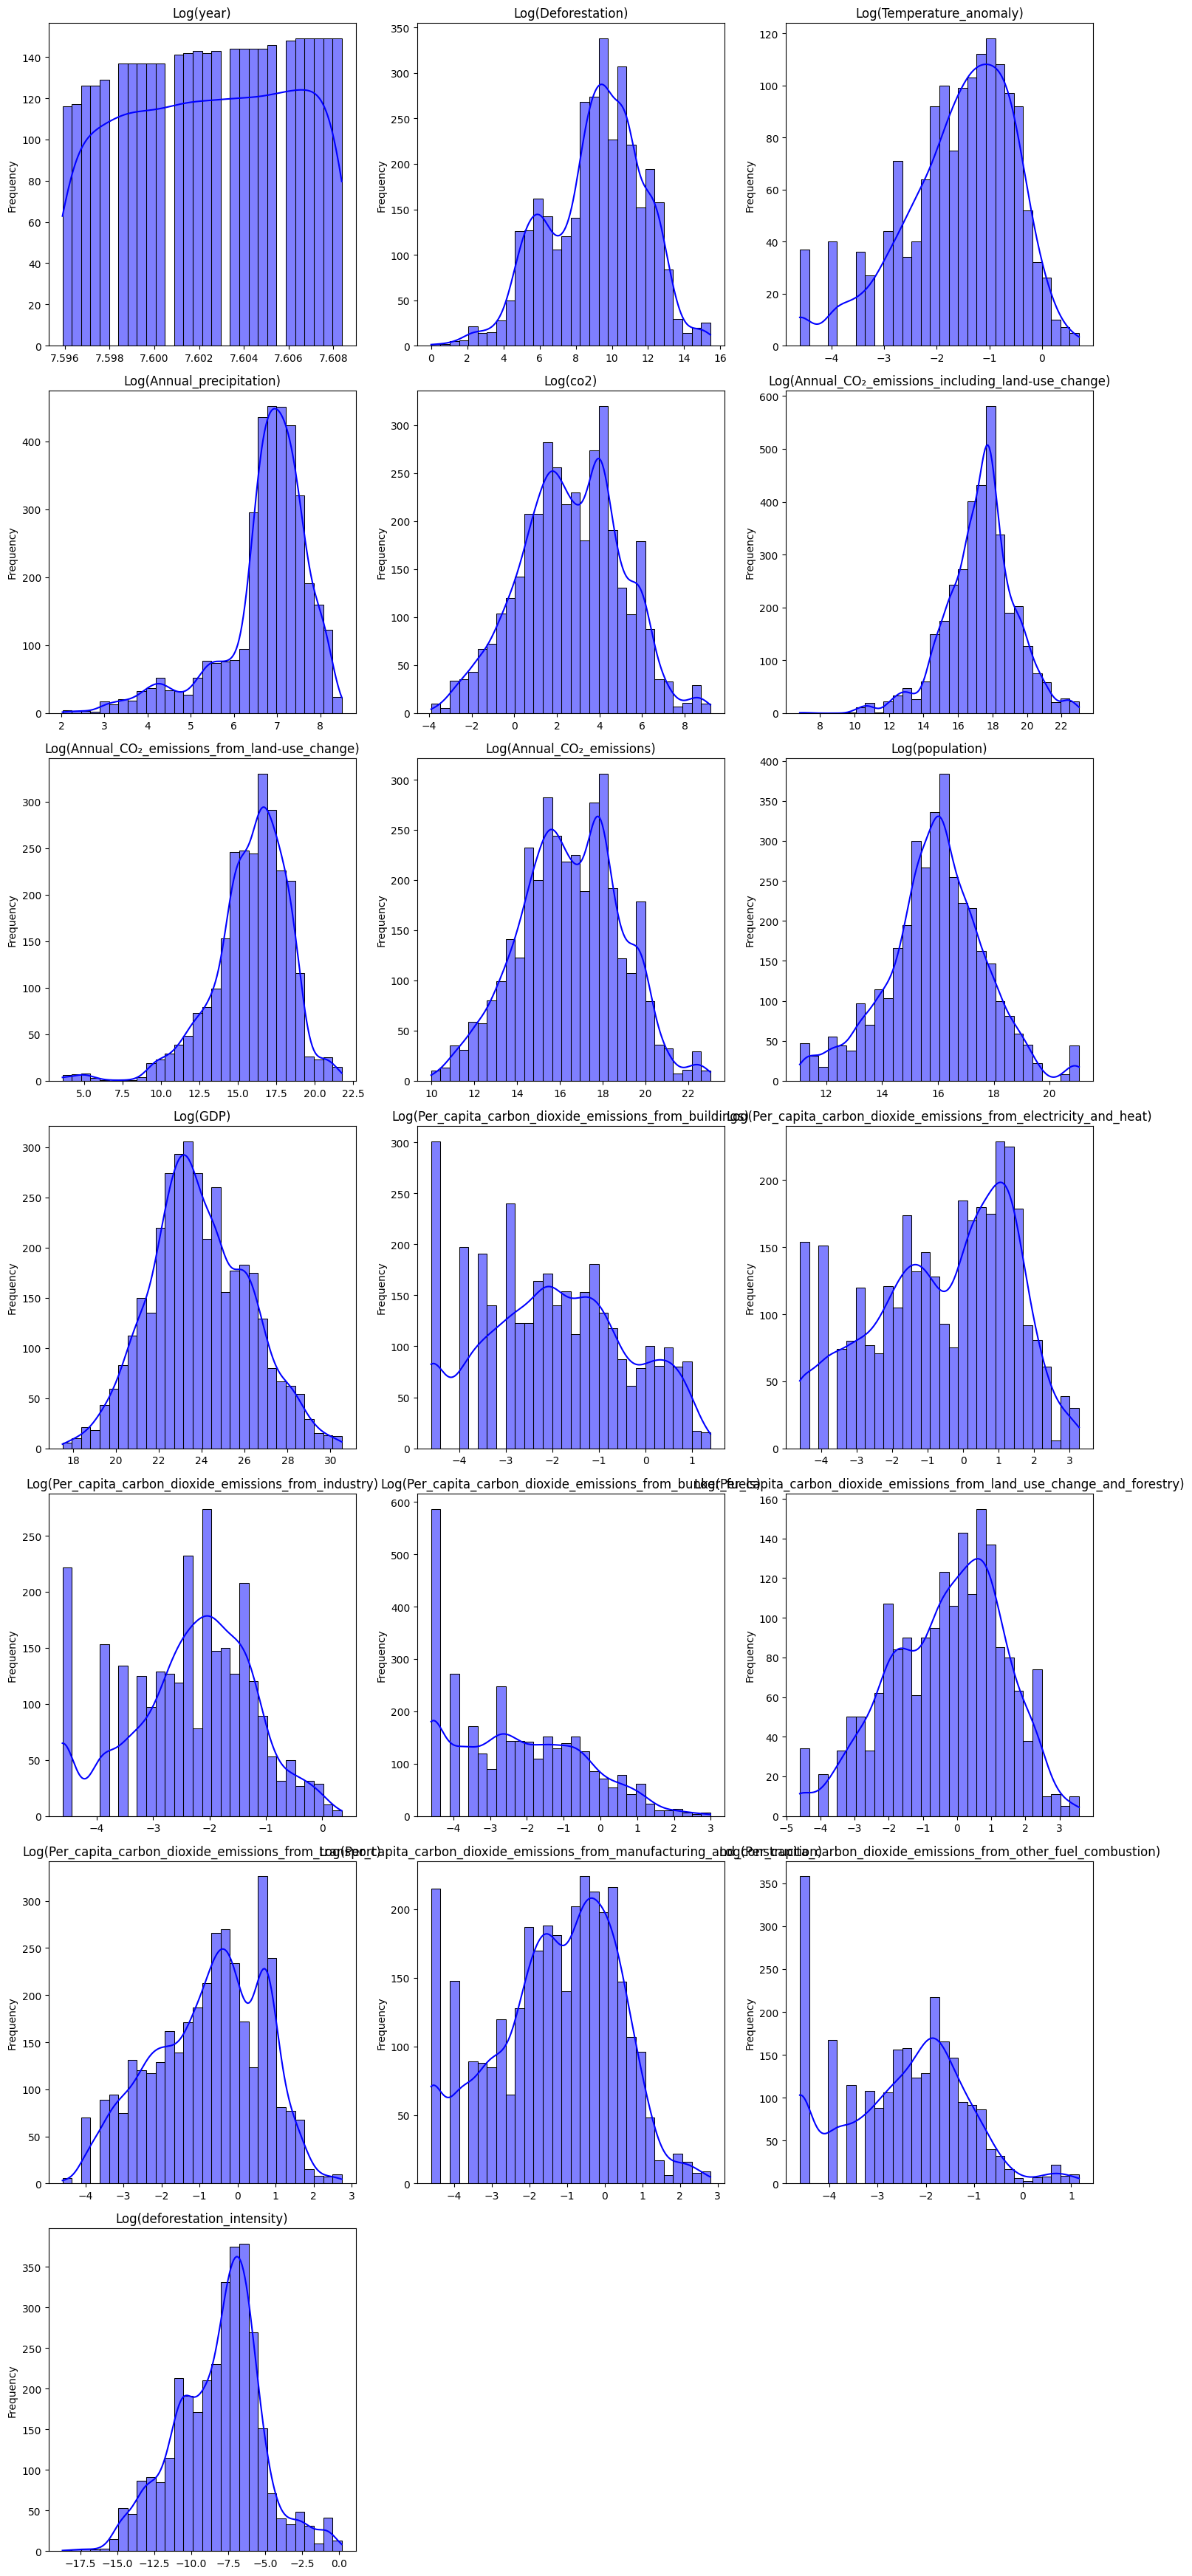

In [38]:

# Function to plot log-transformed distributions in a grid layout
def plot_log_distributions_grid(df, n_cols=3):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    n_rows = -(-len(numeric_columns) // n_cols)  # Calculate rows needed for the grid

    plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size for better visibility
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        data = df[column].dropna()
        # Apply log transformation and handle non-positive values
        data = data[data > 0].apply(np.log)
        sns.histplot(data, kde=True, bins=30, color='blue')
        plt.title(f'Log({column})', fontsize=12)
        plt.xlabel('')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_log_distributions_grid(Master_filtered_df_cleaned, n_cols=3)  # 3 charts per row


##### **Key Observations:**

**Effectiveness of Log Transformation:**
- The log transformation effectively reduces skewness, particularly for variables with extreme outliers (e.g., GDP, CO₂ emissions, deforestation).
- The transformed data now highlights the relative scale of variations across regions or time.

**Clarity in Sector-Specific Emissions:**
- Per capita emissions for electricity, transport, and industry show a clearer distinction between high and low emitters, making it easier to identify patterns and anomalies.

**Insights into Deforestation and Land-Use Change:**
- Moderate deforestation events are frequent, but significant cases of emissions or sequestration from land-use changes remain critical outliers.

**Improved Comparability:**
- The log-transformed distributions make it easier to compare variables across scales and identify consistent patterns, particularly in CO₂-related metrics.

> Now that we have explored the datasets lets model, make some predictions and derive insights from the data.

In [39]:

# Select numeric columns only
numeric_columns = Master_filtered_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Ensure no non-positive values and apply log transformation
log_transformed_data = numeric_columns[numeric_columns > 0].apply(np.log)

# Perform Shapiro-Wilk test on each column
for column in log_transformed_data.columns:
    stat, p = shapiro(log_transformed_data[column].dropna())  # Drop NaN for the test
    print(f'Column: {column}')
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print("Log-transformed data appears to follow a normal distribution.\n")
    else:
        print("Log-transformed data does not appear to follow a normal distribution.\n")


Column: year
Shapiro-Wilk Test: Statistics=0.953, p=0.000
Log-transformed data does not appear to follow a normal distribution.

Column: Deforestation
Shapiro-Wilk Test: Statistics=0.986, p=0.000
Log-transformed data does not appear to follow a normal distribution.

Column: Temperature_anomaly
Shapiro-Wilk Test: Statistics=0.958, p=0.000
Log-transformed data does not appear to follow a normal distribution.

Column: Annual_precipitation
Shapiro-Wilk Test: Statistics=0.875, p=0.000
Log-transformed data does not appear to follow a normal distribution.

Column: co2
Shapiro-Wilk Test: Statistics=0.996, p=0.000
Log-transformed data does not appear to follow a normal distribution.

Column: Annual_CO₂_emissions_including_land-use_change
Shapiro-Wilk Test: Statistics=0.982, p=0.000
Log-transformed data does not appear to follow a normal distribution.

Column: Annual_CO₂_emissions_from_land-use_change
Shapiro-Wilk Test: Statistics=0.939, p=0.000
Log-transformed data does not appear to follow a n

#### Maybe lets try our luck with Box-Cox transformation ?

In [40]:


# Select numeric columns only
numeric_columns = Master_filtered_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Initialize dictionary to store Box-Cox lambda values
boxcox_lambda_values = {}

# Iterate over each numeric column
for column in numeric_columns.columns:
    data = numeric_columns[column].dropna()  # Remove NaN values
    
    # Skip columns with non-positive values for Box-Cox transformation
    if (data <= 0).any():
        print(f"Column: {column} contains non-positive values. Skipping Box-Cox transformation.\n")
        continue

    # Apply Box-Cox transformation
    boxcox_transformed_data, lambda_value = boxcox(data)
    boxcox_lambda_values[column] = lambda_value  # Store lambda value

    # Perform Shapiro-Wilk test on Box-Cox transformed data
    stat_boxcox, p_boxcox = shapiro(boxcox_transformed_data)
    print(f'Column: {column} (Box-Cox Transformation)')
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat_boxcox, p_boxcox))
    if p_boxcox > 0.05:
        print("Box-Cox transformed data appears to follow a normal distribution.\n")
    else:
        print("Box-Cox transformed data does not appear to follow a normal distribution.\n")


Column: year (Box-Cox Transformation)
Shapiro-Wilk Test: Statistics=0.954, p=0.000
Box-Cox transformed data does not appear to follow a normal distribution.

Column: Deforestation contains non-positive values. Skipping Box-Cox transformation.

Column: Temperature_anomaly contains non-positive values. Skipping Box-Cox transformation.

Column: Annual_precipitation (Box-Cox Transformation)
Shapiro-Wilk Test: Statistics=0.987, p=0.000
Box-Cox transformed data does not appear to follow a normal distribution.

Column: co2 (Box-Cox Transformation)
Shapiro-Wilk Test: Statistics=0.996, p=0.000
Box-Cox transformed data does not appear to follow a normal distribution.

Column: Annual_CO₂_emissions_including_land-use_change contains non-positive values. Skipping Box-Cox transformation.

Column: Annual_CO₂_emissions_from_land-use_change contains non-positive values. Skipping Box-Cox transformation.

Column: Annual_CO₂_emissions (Box-Cox Transformation)
Shapiro-Wilk Test: Statistics=0.996, p=0.000
B

Nope!

### We then remembered that there appears to be extreme ("outlier") and Student T Distribution works well with outliers

>Lets give it a go! 
plz ignore the year column :)

Column: year (Student's t-Distribution Fit)
Degrees of Freedom (df): 21507.046, Location (loc): 2002.952, Scale: 7.422



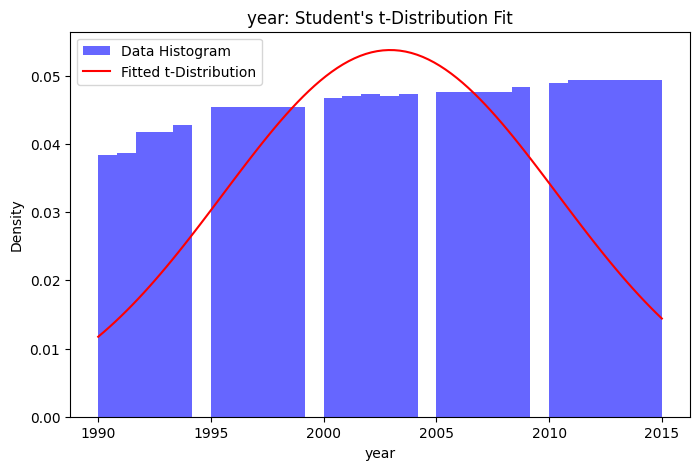

Column: Deforestation (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.286, Location (loc): 318.483, Scale: 841.853



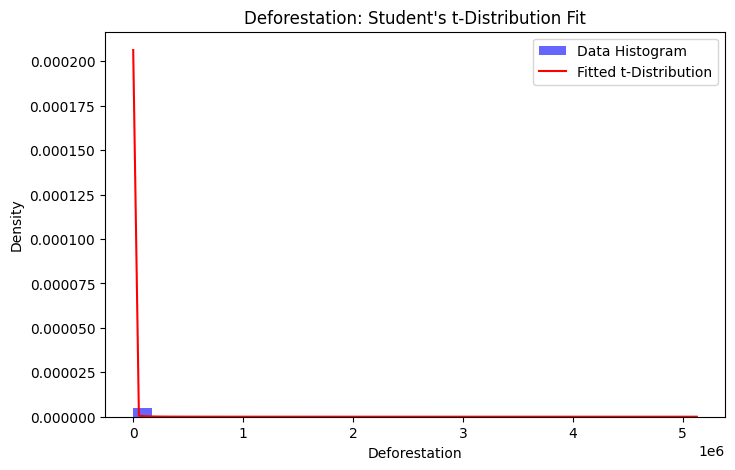

Column: Temperature_anomaly (Student's t-Distribution Fit)
Degrees of Freedom (df): 4.653, Location (loc): -0.076, Scale: 0.372



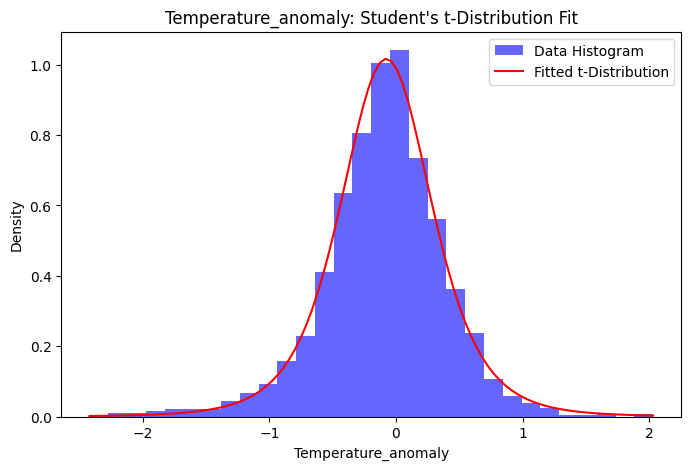

Column: Annual_precipitation (Student's t-Distribution Fit)
Degrees of Freedom (df): 4.193, Location (loc): 1095.136, Scale: 638.798



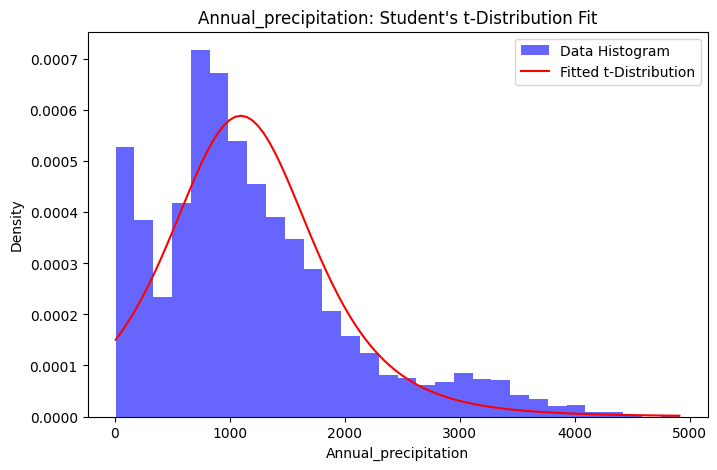

Column: co2 (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.433, Location (loc): 3.455, Scale: 4.649



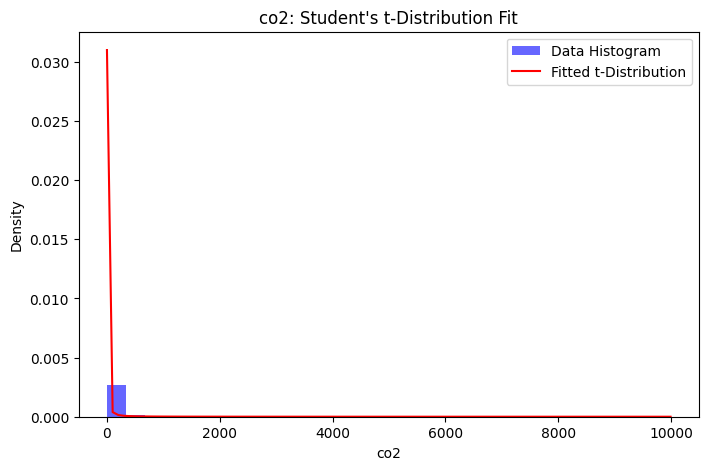

Column: Annual_CO₂_emissions_including_land-use_change (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.719, Location (loc): -58003.844, Scale: 26776753.567



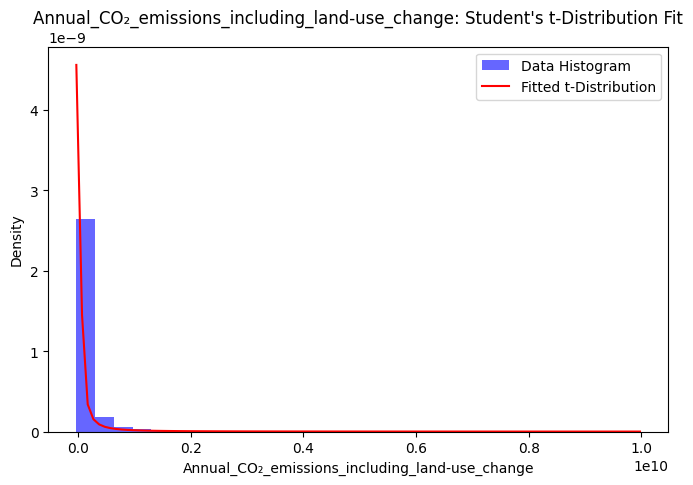

Column: Annual_CO₂_emissions_from_land-use_change (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.539, Location (loc): -8197.782, Scale: 3521731.459



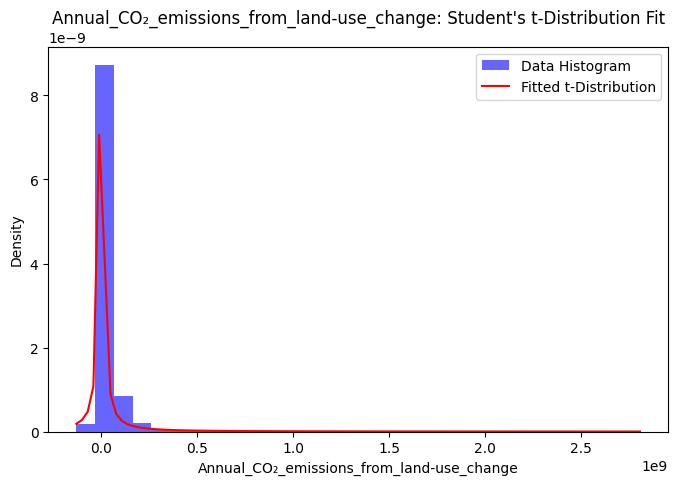

Column: Annual_CO₂_emissions (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.435, Location (loc): 3474005.407, Scale: 4661701.642



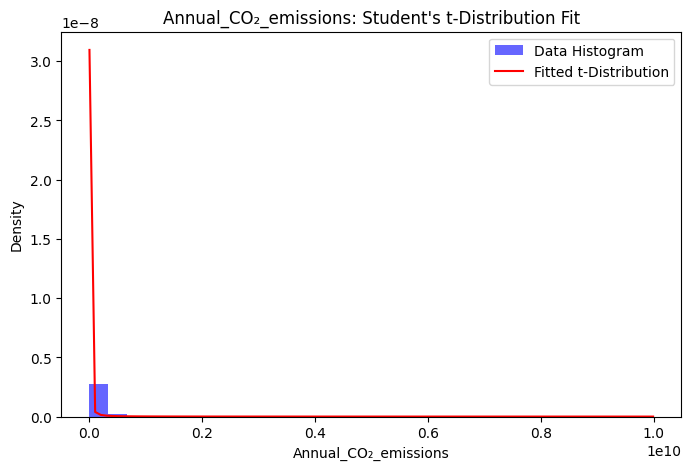

Column: population (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.840, Location (loc): -17407.236, Scale: 7655554.826



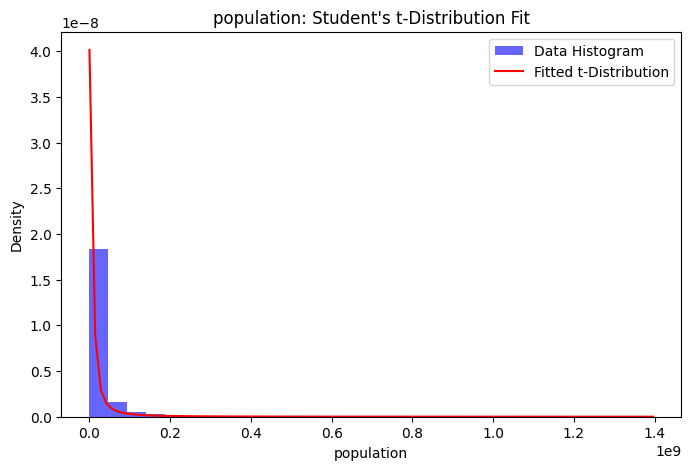

Column: GDP (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.464, Location (loc): -22481706.551, Scale: 10185053276.086



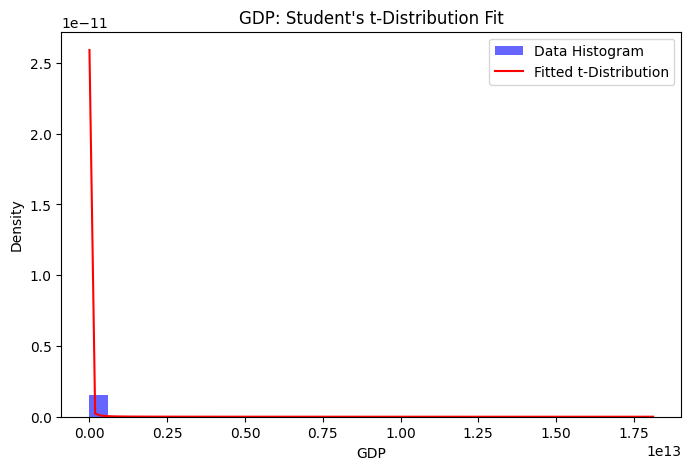

Column: Per_capita_carbon_dioxide_emissions_from_buildings (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.750, Location (loc): 0.066, Scale: 0.077



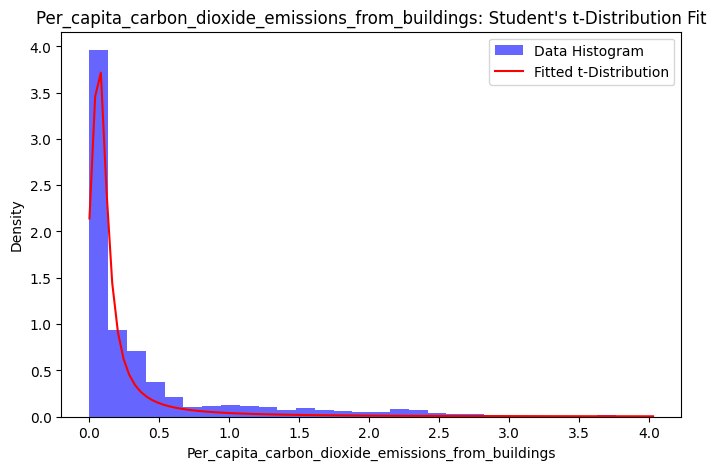

Column: Per_capita_carbon_dioxide_emissions_from_electricity_and_heat (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.523, Location (loc): 0.127, Scale: 0.213



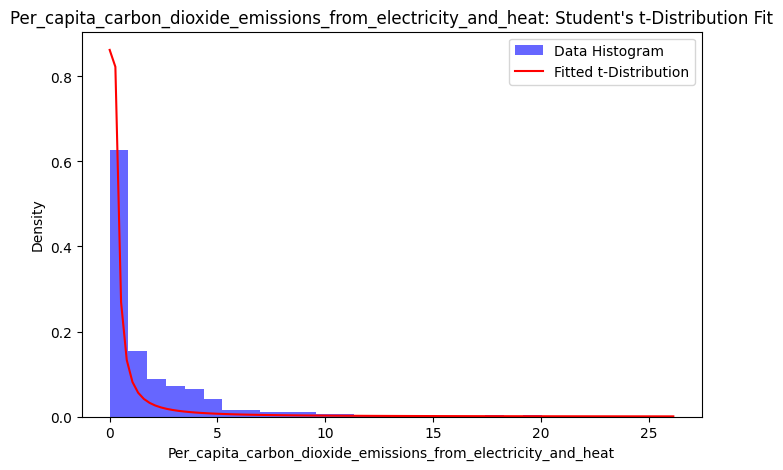

Column: Per_capita_carbon_dioxide_emissions_from_industry (Student's t-Distribution Fit)
Degrees of Freedom (df): 1.943, Location (loc): 0.068, Scale: 0.075



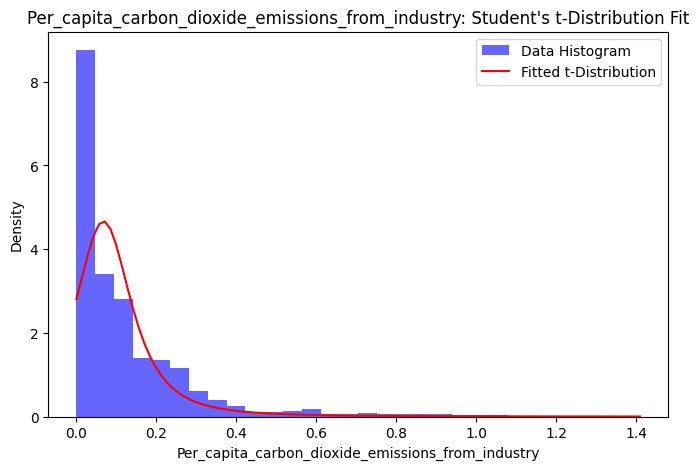

Column: Per_capita_carbon_dioxide_emissions_from_bunker_fuels (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.464, Location (loc): 0.016, Scale: 0.022



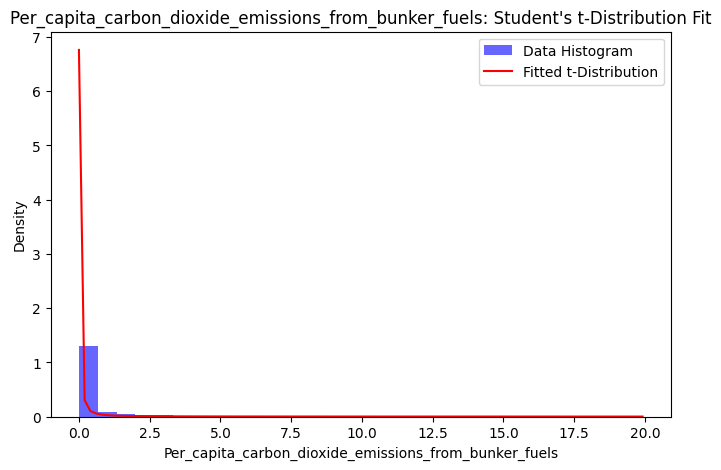

Column: Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.649, Location (loc): 0.033, Scale: 0.305



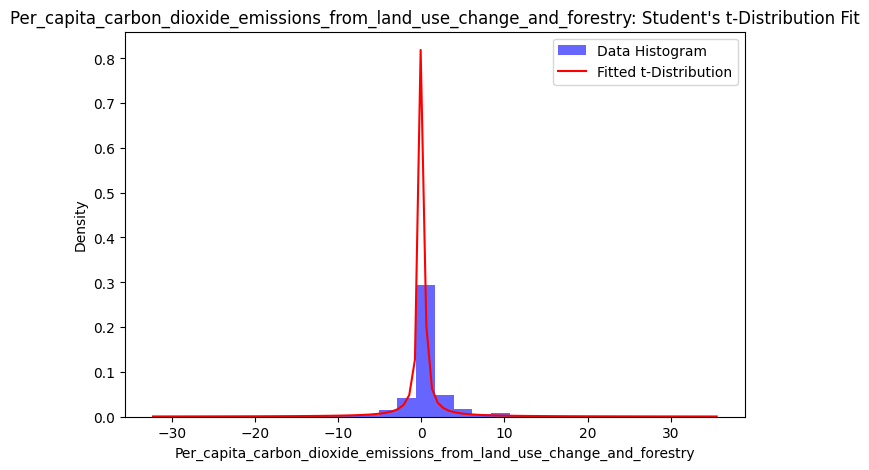

Column: Per_capita_carbon_dioxide_emissions_from_transport (Student's t-Distribution Fit)
Degrees of Freedom (df): 1.376, Location (loc): 0.455, Scale: 0.458



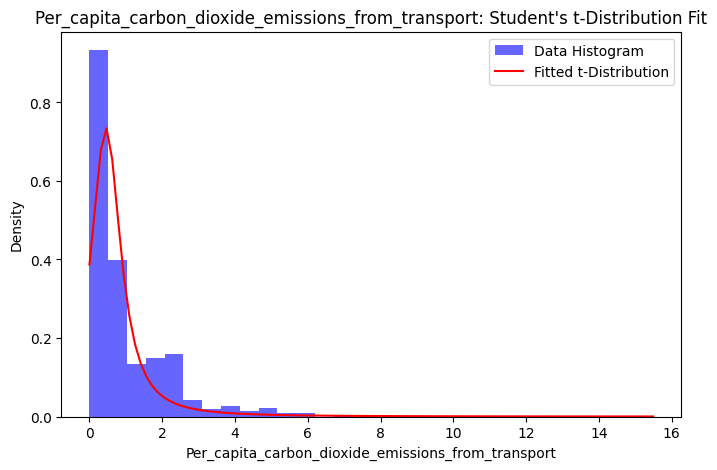

Column: Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.986, Location (loc): 0.173, Scale: 0.216



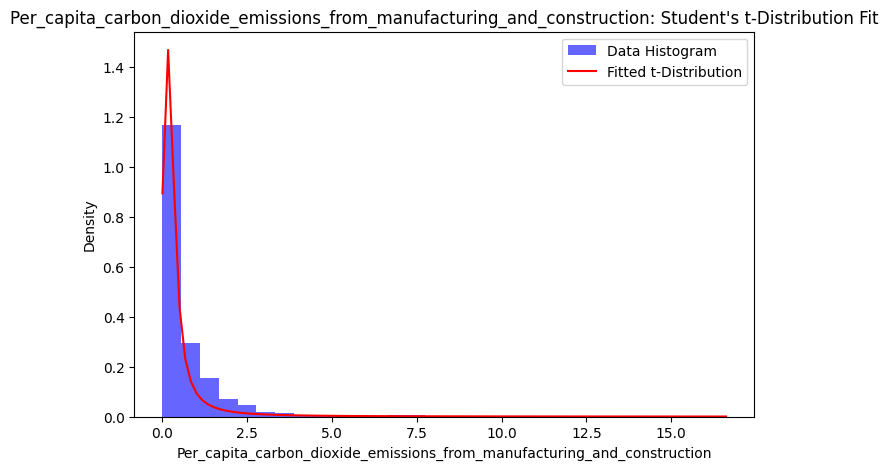

Column: Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.346, Location (loc): 0.000, Scale: 0.000



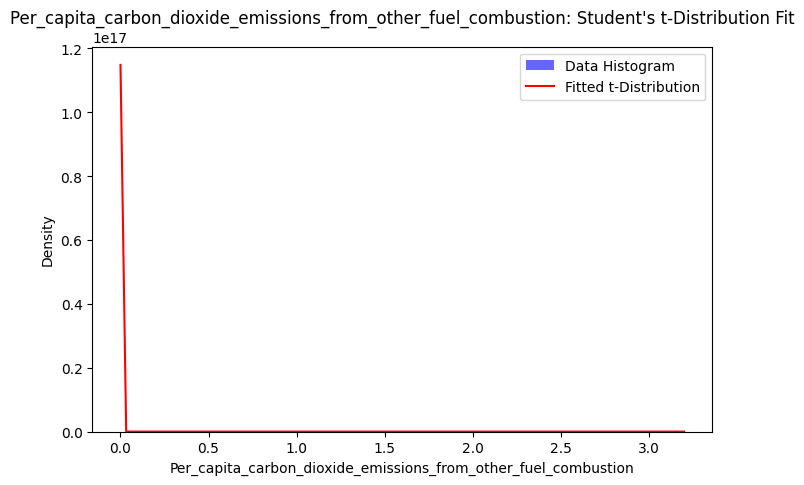

Column: deforestation_intensity (Student's t-Distribution Fit)
Degrees of Freedom (df): 0.283, Location (loc): 0.000, Scale: 0.000



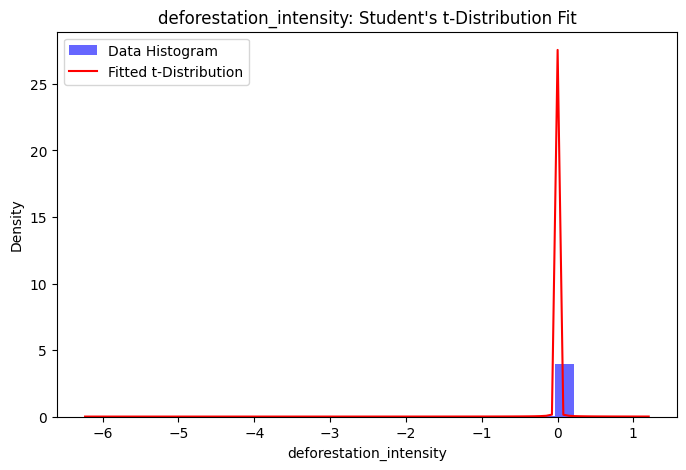


Student's t-Distribution Parameters:
year: df = 21507.046, loc = 2002.952, scale = 7.422
Deforestation: df = 0.286, loc = 318.483, scale = 841.853
Temperature_anomaly: df = 4.653, loc = -0.076, scale = 0.372
Annual_precipitation: df = 4.193, loc = 1095.136, scale = 638.798
co2: df = 0.433, loc = 3.455, scale = 4.649
Annual_CO₂_emissions_including_land-use_change: df = 0.719, loc = -58003.844, scale = 26776753.567
Annual_CO₂_emissions_from_land-use_change: df = 0.539, loc = -8197.782, scale = 3521731.459
Annual_CO₂_emissions: df = 0.435, loc = 3474005.407, scale = 4661701.642
population: df = 0.840, loc = -17407.236, scale = 7655554.826
GDP: df = 0.464, loc = -22481706.551, scale = 10185053276.086
Per_capita_carbon_dioxide_emissions_from_buildings: df = 0.750, loc = 0.066, scale = 0.077
Per_capita_carbon_dioxide_emissions_from_electricity_and_heat: df = 0.523, loc = 0.127, scale = 0.213
Per_capita_carbon_dioxide_emissions_from_industry: df = 1.943, loc = 0.068, scale = 0.075
Per_capita

In [41]:

# Select numeric columns only
numeric_columns = Master_filtered_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Initialize dictionaries to store results
boxcox_lambda_values = {}
t_params = {}

# Iterate over each numeric column
for column in numeric_columns.columns:
    data = numeric_columns[column].dropna()  # Remove NaN values


    # Fit a t-distribution to the original data
    t_params[column] = t.fit(data)  # Fit t-distribution (df, loc, scale)
    df, loc, scale = t_params[column]
    print(f'Column: {column} (Student\'s t-Distribution Fit)')
    print(f"Degrees of Freedom (df): {df:.3f}, Location (loc): {loc:.3f}, Scale: {scale:.3f}\n")

    # Plot the histogram and fitted t-distribution
    x = np.linspace(min(data), max(data), 100)
    pdf = t.pdf(x, df, loc, scale)

    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Data Histogram')
    plt.plot(x, pdf, 'r-', label='Fitted t-Distribution')
    plt.title(f'{column}: Student\'s t-Distribution Fit')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()



# Print Student's t-distribution parameters
print("\nStudent's t-Distribution Parameters:")
for column, params in t_params.items():
    df, loc, scale = params
    print(f'{column}: df = {df:.3f}, loc = {loc:.3f}, scale = {scale:.3f}')


#### Looks promising , lets zoom it in with log transformation

Column: year (Student's t-Distribution Fit on Log Values)
Degrees of Freedom (df): 2914.138, Location (loc): 7.602, Scale: 0.004



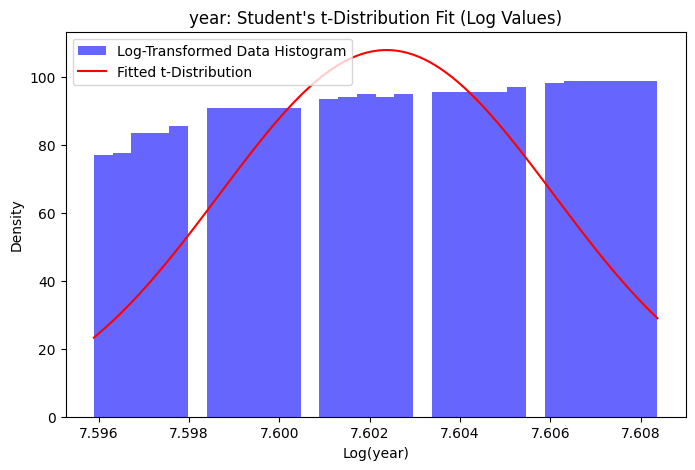

Column: Deforestation contains non-positive values. Skipping log  transformations.

Column: Temperature_anomaly contains non-positive values. Skipping log  transformations.

Column: Annual_precipitation (Student's t-Distribution Fit on Log Values)
Degrees of Freedom (df): 2.197, Location (loc): 6.966, Scale: 0.572



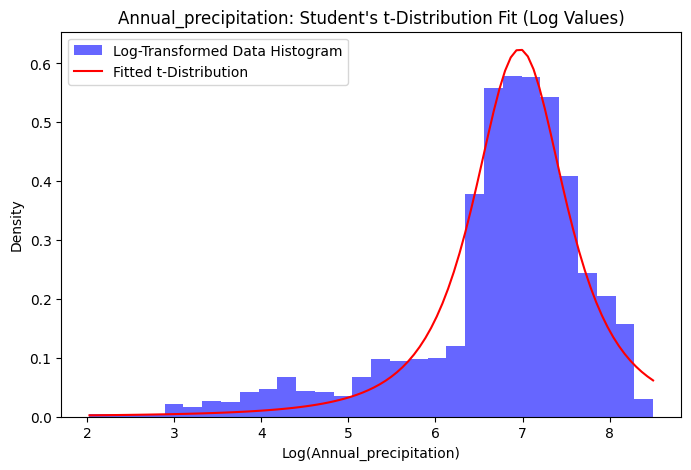

Column: co2 (Student's t-Distribution Fit on Log Values)
Degrees of Freedom (df): 3214050607.018, Location (loc): 2.648, Scale: 2.350



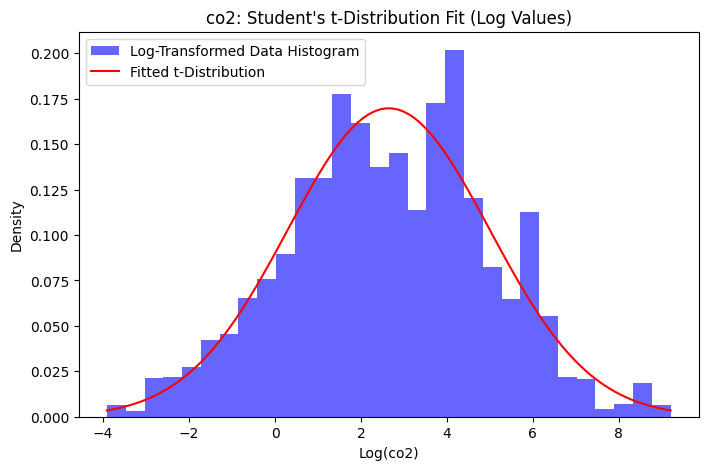

Column: Annual_CO₂_emissions_including_land-use_change contains non-positive values. Skipping log  transformations.

Column: Annual_CO₂_emissions_from_land-use_change contains non-positive values. Skipping log  transformations.

Column: Annual_CO₂_emissions (Student's t-Distribution Fit on Log Values)
Degrees of Freedom (df): 6158.923, Location (loc): 16.463, Scale: 2.350



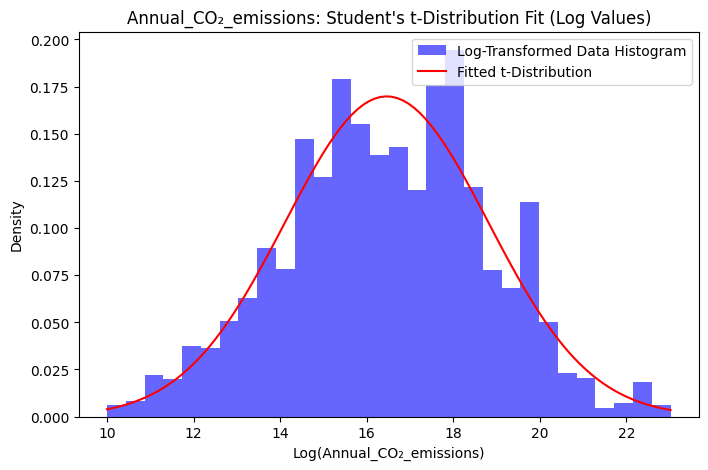

Column: population (Student's t-Distribution Fit on Log Values)
Degrees of Freedom (df): 8.973, Location (loc): 15.935, Scale: 1.579



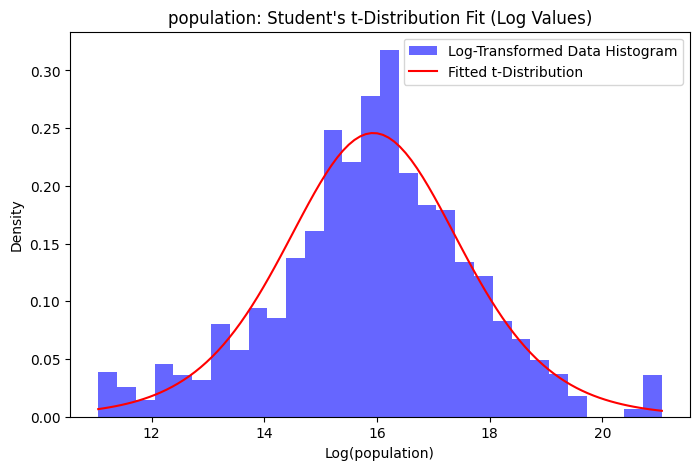

Column: GDP (Student's t-Distribution Fit on Log Values)
Degrees of Freedom (df): 18367.469, Location (loc): 23.901, Scale: 2.300



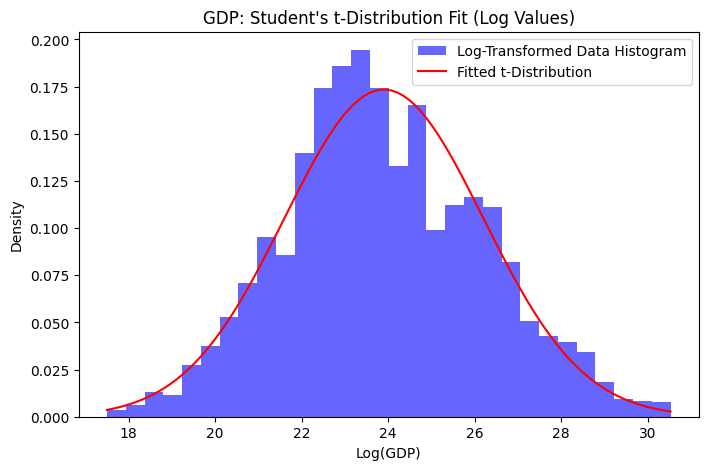

Column: Per_capita_carbon_dioxide_emissions_from_buildings contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_electricity_and_heat contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_industry contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_bunker_fuels contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_transport contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction contains non-positive values. Skipping log  transformations.

Column: Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion contains non-positive values.

In [42]:

# Select numeric columns only
numeric_columns = Master_filtered_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Initialize dictionaries to store results
boxcox_lambda_values = {}
t_params = {}

# Iterate over each numeric column
for column in numeric_columns.columns:
    data = numeric_columns[column].dropna()  # Remove NaN values
    
    # Skip columns with non-positive values for log transformation or Box-Cox
    if (data <= 0).any():
        print(f"Column: {column} contains non-positive values. Skipping log  transformations.\n")
        continue

    # Apply log transformation
    log_transformed_data = np.log(data)



    # Fit a t-distribution to the log-transformed data
    t_params[column] = t.fit(log_transformed_data)  # Fit t-distribution (df, loc, scale)
    df, loc, scale = t_params[column]
    print(f'Column: {column} (Student\'s t-Distribution Fit on Log Values)')
    print(f"Degrees of Freedom (df): {df:.3f}, Location (loc): {loc:.3f}, Scale: {scale:.3f}\n")

    # Plot the histogram and fitted t-distribution
    x = np.linspace(min(log_transformed_data), max(log_transformed_data), 100)
    pdf = t.pdf(x, df, loc, scale)

    plt.figure(figsize=(8, 5))
    plt.hist(log_transformed_data, bins=30, density=True, alpha=0.6, color='blue', label='Log-Transformed Data Histogram')
    plt.plot(x, pdf, 'r-', label='Fitted t-Distribution')
    plt.title(f'{column}: Student\'s t-Distribution Fit (Log Values)')
    plt.xlabel(f'Log({column})')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


# Print Student's t-distribution parameters
print("\nStudent's t-Distribution Parameters (Log Values):")
for column, params in t_params.items():
    df, loc, scale = params
    print(f'{column}: df = {df:.3f}, loc = {loc:.3f}, scale = {scale:.3f}')


### Let us try to take one feature and fit the shape and derive something meaningful out of it

> First lets try to fit it and make a synthetic distribution and compare it with the original and test the fit with Kolmogorov-Smirnov Test

Original Data Statistics:
{'Mean': np.float64(15.907107055983953), 'Standard Deviation': np.float64(1.779925259629187), 'Skewness': np.float64(-0.13784629701865722), 'Kurtosis': np.float64(0.450906675448965)}

Synthetic Data Statistics:
{'Mean': np.float64(15.931817925422008), 'Standard Deviation': np.float64(1.8560826317339267), 'Skewness': np.float64(0.08825360198104548), 'Kurtosis': np.float64(1.365544690426526)}


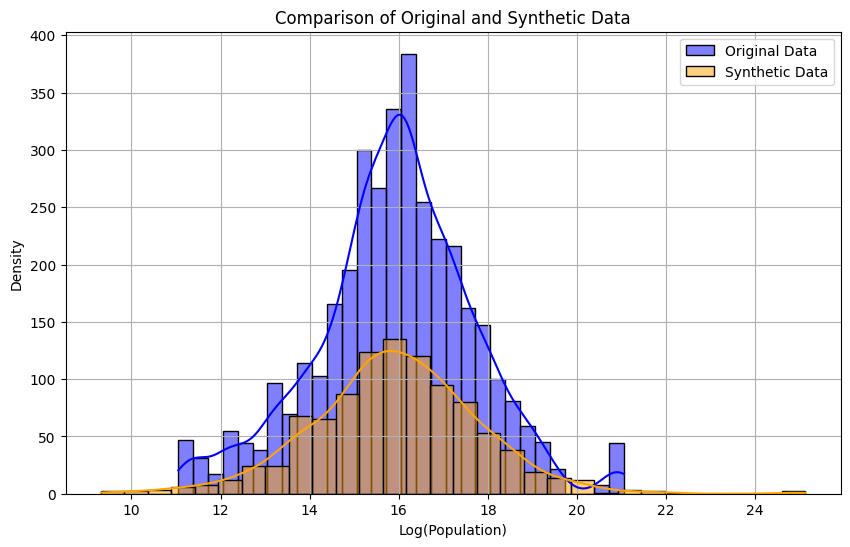

Kolmogorov-Smirnov Test:
KS Statistic: 0.0313, p-value: 0.4179
The synthetic data appears to be a good match for the original data.


In [43]:

# Assume log_population is the log-transformed actual data and synthetic_population is the synthetic data

df, loc, scale = t_params['population']  # Assuming t_params['population'] exists from the previous analysis

# Generate synthetic data from the fitted t-distribution
synthetic_population = t.rvs(df, loc, scale, size=1000)

# Plot the synthetic data vs. the original log-transformed data
log_population = np.log(numeric_columns['population'].dropna())

# Quantitative Comparison
original_stats = {
    "Mean": np.mean(log_population),
    "Standard Deviation": np.std(log_population),
    "Skewness": pd.Series(log_population).skew(),
    "Kurtosis": pd.Series(log_population).kurt()
}

synthetic_stats = {
    "Mean": np.mean(synthetic_population),
    "Standard Deviation": np.std(synthetic_population),
    "Skewness": pd.Series(synthetic_population).skew(),
    "Kurtosis": pd.Series(synthetic_population).kurt()
}

# Display Statistics
print("Original Data Statistics:")
print(original_stats)
print("\nSynthetic Data Statistics:")
print(synthetic_stats)

# Visual Comparison
plt.figure(figsize=(10, 6))
sns.histplot(log_population, bins=30, kde=True, color='blue', alpha=0.5, label="Original Data")
sns.histplot(synthetic_population, bins=30, kde=True, color='orange', alpha=0.5, label="Synthetic Data")
plt.title("Comparison of Original and Synthetic Data")
plt.xlabel("Log(Population)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Distributional Comparison - Kolmogorov-Smirnov Test
ks_stat, ks_p = ks_2samp(log_population, synthetic_population)
print("Kolmogorov-Smirnov Test:")
print(f"KS Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")
if ks_p > 0.05:
    print("The synthetic data appears to be a good match for the original data.")
else:
    print("The synthetic data does not match the original data well.")


Looks gooooodddd

#### Now that we have fitted the model lets forecast!



Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma, nu]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rich/live.py:256: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


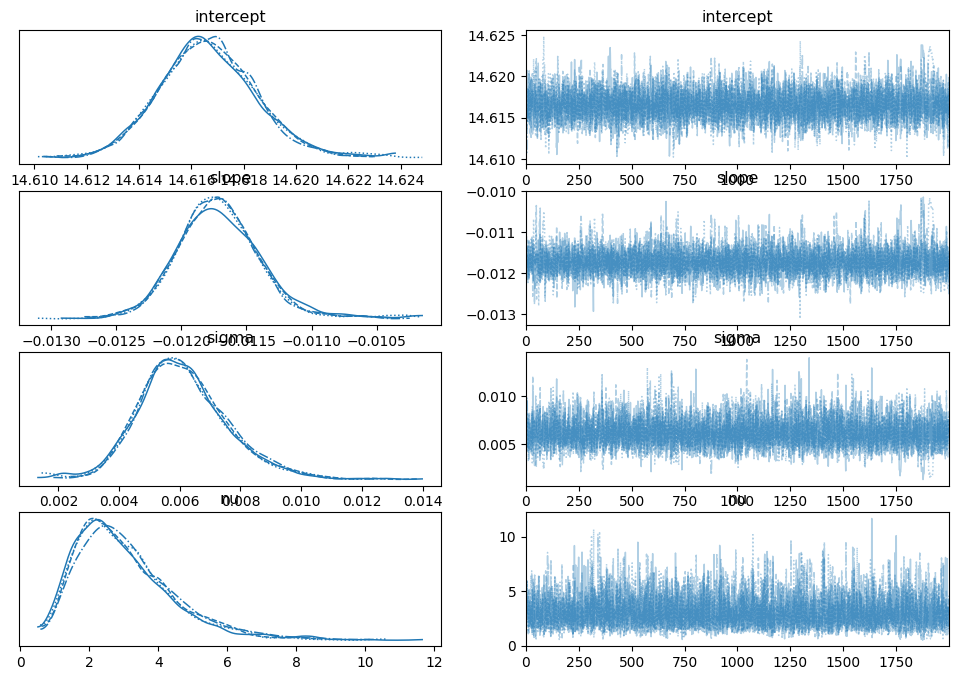

Sampling: [likelihood]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rich/live.py:256: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

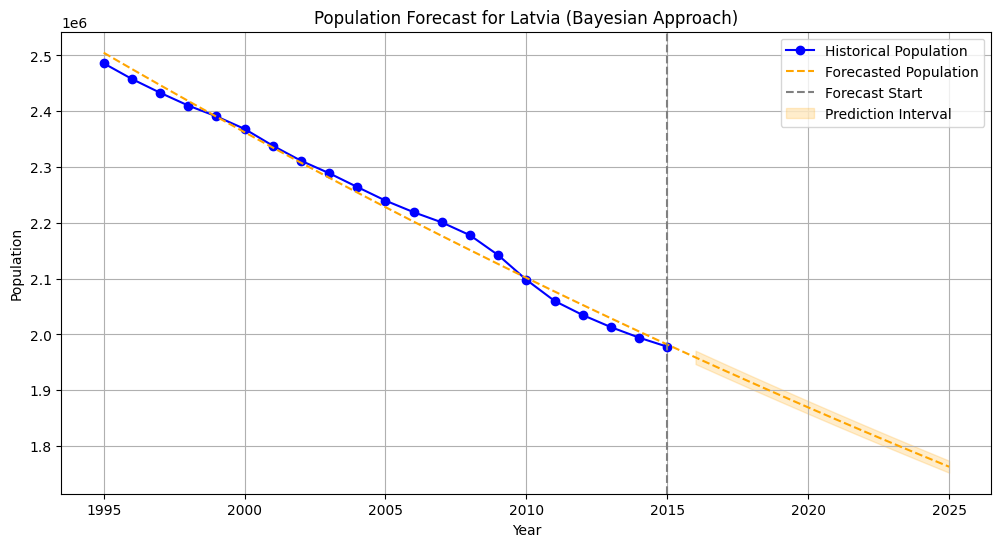

In [44]:

df = Master_filtered_df_cleaned

# Filter for a specific country 
country_name = "Latvia"
df_country = df[df["country"] == country_name].copy()

# Sort by year and reset the index
df_country.sort_values(by="year", inplace=True)
df_country.reset_index(drop=True, inplace=True)

# Log-transform the population column to stabilize variance
df_country["log_population"] = np.log(df_country["population"])

# Prepare the data for Bayesian modeling
years = df_country["year"].values
log_population = df_country["log_population"].values

# Forecast horizon (10 years into the future)
forecast_years = np.arange(years[-1] + 1, years[-1] + 11)

# Bayesian model using Student's t-distribution
with pm.Model() as model:
    # Priors for the slope (trend) and intercept
    intercept = pm.Normal("intercept", mu=log_population.mean(), sigma=5)
    slope = pm.Normal("slope", mu=0, sigma=1)

    # Noise modeled as Student's t-distribution
    sigma = pm.HalfNormal("sigma", sigma=1)
    nu = pm.Exponential("nu", lam=1)  # Degrees of freedom for t-distribution

    # Linear model for the mean
    mean = intercept + slope * (years - years.mean())

    # Likelihood (observed data)
    likelihood = pm.StudentT(
        "likelihood",
        mu=mean,
        sigma=sigma,
        nu=nu,
        observed=log_population
    )

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9, random_seed=42)

# Summarize the posterior
az.plot_trace(trace, var_names=["intercept", "slope", "sigma", "nu"])
plt.show()

# Generate predictions for historical and forecast years
with model:
    # Create an array of all years (historical + forecast)
    all_years = np.concatenate([years, forecast_years])
    all_years_centered = all_years - years.mean()

    # Use the posterior samples to generate predictions manually
    intercept_samples = trace.posterior["intercept"].mean(dim=["chain", "draw"]).values
    slope_samples = trace.posterior["slope"].mean(dim=["chain", "draw"]).values

    # Compute the mean predictions
    mean_predictions = intercept_samples + slope_samples * all_years_centered

    # Sample posterior predictive
    posterior_predictive = pm.sample_posterior_predictive(trace, random_seed=42)

# Plot historical and forecasted population
def plot_population_forecast():
    plt.figure(figsize=(12, 6))
    plt.plot(years, np.exp(log_population), label="Historical Population", marker="o", color="blue")
    plt.plot(all_years, np.exp(mean_predictions), label="Forecasted Population", linestyle="--", color="orange")

    # Highlight forecast years
    plt.axvline(x=years[-1], color="gray", linestyle="--", label="Forecast Start")
    plt.fill_between(
        forecast_years,
        np.exp(mean_predictions[-len(forecast_years):] - trace.posterior["sigma"].mean().values),
        np.exp(mean_predictions[-len(forecast_years):] + trace.posterior["sigma"].mean().values),
        color="orange",
        alpha=0.2,
        label="Prediction Interval"
    )

    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.title(f"Population Forecast for {country_name} (Bayesian Approach)")
    plt.legend()
    plt.grid()
    plt.show()

plot_population_forecast()


> We did something but we deviated from our topic, now lets focus on C02 emissions.

#### Now that we have some idea lets do it for Co2 emissions with additional predictors which we know has high correlation

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope_gdp, slope_year, sigma, nu]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rich/live.py:256: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


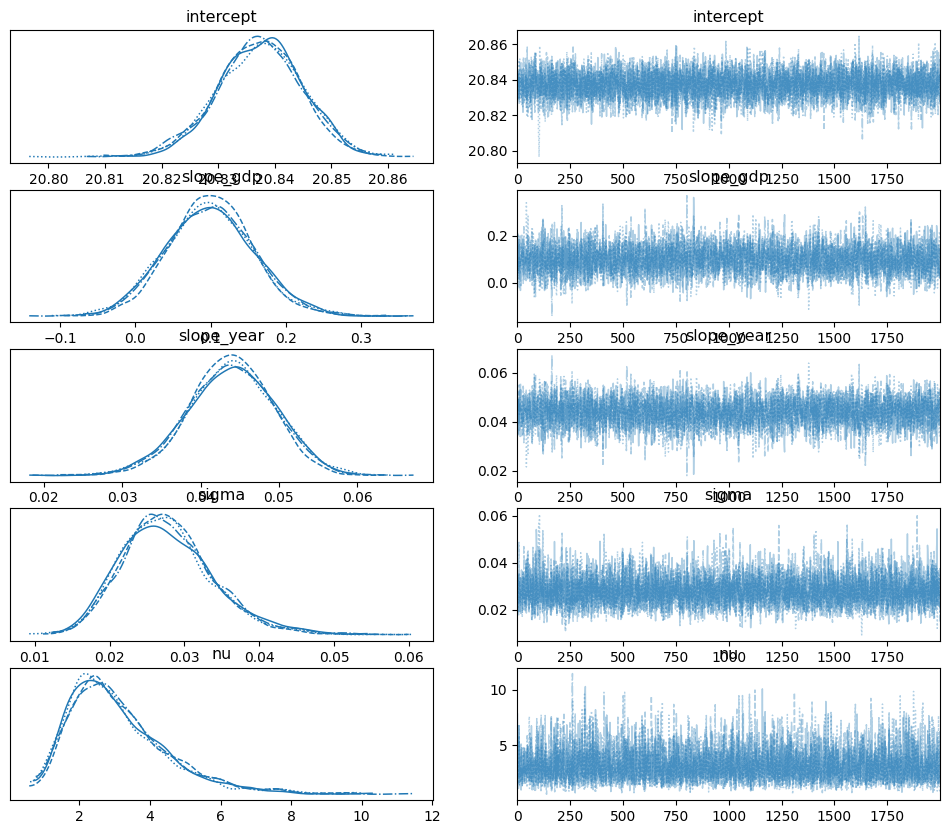

R-squared on historical data: 0.994
Mean Squared Error on historical data: 0.001


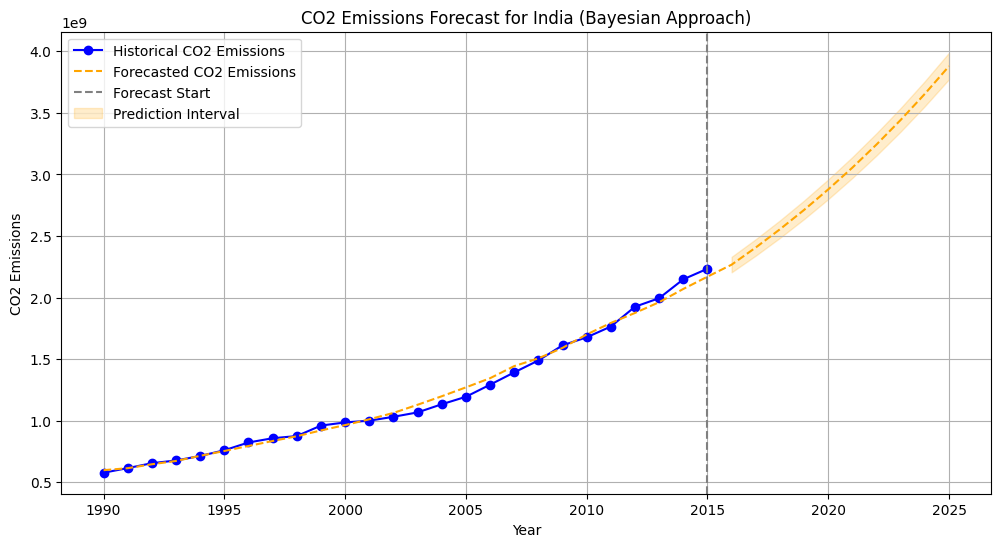

In [58]:

from sklearn.metrics import mean_squared_error, r2_score


df = Master_filtered_df_cleaned

# Filter
df_india = df[df["country"] == "India"].copy()

# Sort by year and reset index
df_india.sort_values(by="year", inplace=True)
df_india.reset_index(drop=True, inplace=True)

# Log-transform CO2 emissions and GDP
df_india["log_CO2_emissions"] = np.log(df_india["Annual_CO₂_emissions"])
df_india["log_GDP"] = np.log(df_india["GDP"])

# Prepare the data for Bayesian modeling
years = df_india["year"].values
log_co2_emissions = df_india["log_CO2_emissions"].values
log_gdp = df_india["log_GDP"].values

# Forecast horizon (10 years into the future)
forecast_years = np.arange(years[-1] + 1, years[-1] + 11)
forecast_gdp = np.linspace(log_gdp[-1], log_gdp[-1] * 1.05, len(forecast_years))

# Bayesian model with GDP as predictor
with pm.Model() as model:
    # Priors for the coefficients
    intercept = pm.Normal("intercept", mu=log_co2_emissions.mean(), sigma=5)
    slope_gdp = pm.Normal("slope_gdp", mu=0, sigma=1)
    slope_year = pm.Normal("slope_year", mu=0, sigma=1)

    # Noise modeled as Student's t-distribution
    sigma = pm.HalfNormal("sigma", sigma=1)
    nu = pm.Exponential("nu", lam=1)

    # Linear model for the mean
    mean = (
        intercept
        + slope_gdp * (log_gdp - log_gdp.mean())
        + slope_year * (years - years.mean())
    )

    # Likelihood (observed data)
    likelihood = pm.StudentT(
        "likelihood",
        mu=mean,
        sigma=sigma,
        nu=nu,
        observed=log_co2_emissions
    )

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9, random_seed=42)

# Summarize the posterior
az.plot_trace(trace, var_names=["intercept", "slope_gdp", "slope_year", "sigma", "nu"])
plt.show()


# Generate predictions for historical and forecast years
with model:
    # Create arrays of all years and corresponding GDP (historical + forecast)
    all_years = np.concatenate([years, forecast_years])
    all_gdp = np.concatenate([log_gdp, forecast_gdp])
    all_years_centered = all_years - years.mean()
    all_gdp_centered = all_gdp - log_gdp.mean()

    # Use the posterior samples to compute mean predictions
    intercept_samples = trace.posterior["intercept"].mean(dim=["chain", "draw"]).values
    slope_gdp_samples = trace.posterior["slope_gdp"].mean(dim=["chain", "draw"]).values
    slope_year_samples = trace.posterior["slope_year"].mean(dim=["chain", "draw"]).values

    # Compute predictions for each year and GDP
    mean_pred = (
        intercept_samples
        + slope_gdp_samples * all_gdp_centered
        + slope_year_samples * all_years_centered
    )

# Validation on historical data
historical_predictions = mean_pred[:len(years)]
r2 = r2_score(log_co2_emissions, historical_predictions)
mse = mean_squared_error(log_co2_emissions, historical_predictions)

print(f"R-squared on historical data: {r2:.3f}")
print(f"Mean Squared Error on historical data: {mse:.3f}")

# Plot historical and forecasted CO2 emissions
def plot_co2_forecast():
    plt.figure(figsize=(12, 6))
    plt.plot(years, np.exp(log_co2_emissions), label="Historical CO2 Emissions", marker="o", color="blue")
    plt.plot(all_years, np.exp(mean_pred), label="Forecasted CO2 Emissions", linestyle="--", color="orange")

    # Highlight forecast years
    plt.axvline(x=years[-1], color="gray", linestyle="--", label="Forecast Start")
    plt.fill_between(
        forecast_years,
        np.exp(mean_pred[-len(forecast_years):] - trace.posterior["sigma"].mean().values),
        np.exp(mean_pred[-len(forecast_years):] + trace.posterior["sigma"].mean().values),
        color="orange",
        alpha=0.2,
        label="Prediction Interval"
    )

    plt.xlabel("Year")
    plt.ylabel("CO2 Emissions")
    plt.title("CO2 Emissions Forecast for India (Bayesian Approach)")
    plt.legend()
    plt.grid()
    plt.show()

plot_co2_forecast()



<center>
<img src="ipynb.images/Cute_panda.jpeg" width="400" />
</center>

# From Data Chaos to Carbon Clarity!

## Thank you everyone 




## 

### Extra:

Slope (beta): 0.9483438969382374, Intercept: -6.202879102588245


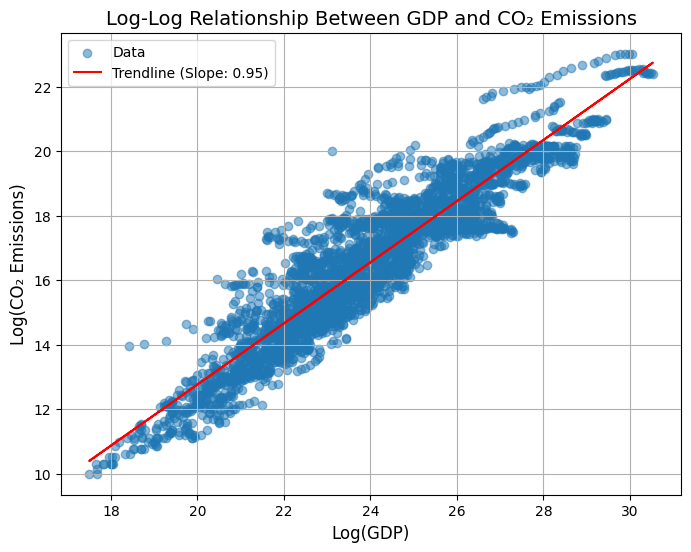

Top 10 Inefficient Economies (Emissions > Predicted):
           country  year  Residuals  Annual_CO₂_emissions           GDP
4028        Kuwait  1991   4.291007           492841280.0  1.100879e+10
7819  Turkmenistan  1999   3.199378            39796908.0  2.450564e+09
8173    Uzbekistan  2002   3.099195           132575224.0  9.687789e+09
7815  Turkmenistan  1995   3.049290            34569176.0  2.474614e+09
8174    Uzbekistan  2003   3.039095           130294420.0  1.013445e+10
7814  Turkmenistan  1994   3.030673            34216140.0  2.496503e+09
7820  Turkmenistan  2000   3.027160            39361496.0  2.904663e+09
7816  Turkmenistan  1996   2.998663            31654202.0  2.378760e+09
7818  Turkmenistan  1998   2.967299            33445510.0  2.605688e+09
521     Azerbaijan  1994   2.965716            41944856.0  3.313940e+09

Top 10 Efficient Economies (Emissions < Predicted):
          country  year  Residuals  Annual_CO₂_emissions           GDP
7405  Switzerland  2014  -2.19

In [59]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Log-transform GDP and Emissions
log_gdp = np.log(Master_filtered_df_cleaned['GDP'])
log_emissions = np.log(Master_filtered_df_cleaned['Annual_CO₂_emissions'])

# Fit a linear regression
model = LinearRegression()
model.fit(log_gdp.values.reshape(-1, 1), log_emissions.values)

# Get slope (beta) and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (beta): {slope}, Intercept: {intercept}")

# Predict values for the trendline
predicted_emissions = model.predict(log_gdp.values.reshape(-1, 1))

# Scatter plot with trendline
plt.figure(figsize=(8, 6))
plt.scatter(log_gdp, log_emissions, alpha=0.5, label='Data')
plt.plot(log_gdp, predicted_emissions, color='red', label=f'Trendline (Slope: {slope:.2f})')
plt.title('Log-Log Relationship Between GDP and CO₂ Emissions', fontsize=14)
plt.xlabel('Log(GDP)', fontsize=12)
plt.ylabel('Log(CO₂ Emissions)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Add residuals to the dataset
Master_filtered_df_cleaned['Residuals'] = log_emissions - predicted_emissions

# Identify inefficient economies (positive residuals)
inefficient_economies = Master_filtered_df_cleaned[Master_filtered_df_cleaned['Residuals'] > 0].sort_values(by='Residuals', ascending=False)

# Identify efficient economies (negative residuals)
efficient_economies = Master_filtered_df_cleaned[Master_filtered_df_cleaned['Residuals'] < 0].sort_values(by='Residuals', ascending=True)

# Display top inefficient and efficient economies
print("Top 10 Inefficient Economies (Emissions > Predicted):")
print(inefficient_economies[['country', 'year', 'Residuals', 'Annual_CO₂_emissions', 'GDP']].head(10))

print("\nTop 10 Efficient Economies (Emissions < Predicted):")
print(efficient_economies[['country', 'year', 'Residuals', 'Annual_CO₂_emissions', 'GDP']].head(10))


### QC / Rough Area

In [47]:
Master_filtered_df[Master_filtered_df['country']=='Australia']

,country,year,Deforestation,Temperature_anomaly,Annual_precipitation,co2,Annual_CO₂_emissions_including_land-use_change,Annual_CO₂_emissions_from_land-use_change,Annual_CO₂_emissions,population,GDP,Per_capita_carbon_dioxide_emissions_from_buildings,Per_capita_carbon_dioxide_emissions_from_electricity_and_heat,Per_capita_carbon_dioxide_emissions_from_industry,Per_capita_carbon_dioxide_emissions_from_bunker_fuels,Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry,Per_capita_carbon_dioxide_emissions_from_transport,Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction,Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion
439,Australia,1990,626200.0,0.074013,417.55386,278.160,259540030.0,-18620448.0,278160480.0,17126301.0,3.108380e+11,0.503903,8.328127,0.202028,0.379533,2.959191,3.621915,2.502000,0.197941
440,Australia,1991,NaN,0.162453,454.97507,279.534,222567360.0,-56966884.0,279534240.0,17353191.0,3.253580e+11,0.500196,8.369065,0.183252,0.372842,2.920500,3.491577,2.483693,0.197082
441,Australia,1992,NaN,-0.500475,443.11100,284.529,306821860.0,22292876.0,284529000.0,17549282.0,3.248780e+11,0.513411,8.414589,0.166389,0.389760,2.887868,3.537467,2.439986,0.197159
442,Australia,1993,NaN,-0.191261,481.63162,288.874,331080800.0,42207044.0,288873760.0,17722905.0,3.115290e+11,0.528694,8.412843,0.169837,0.418667,2.859577,3.565443,2.466864,0.201998
443,Australia,1994,NaN,-0.137555,324.84500,293.701,319489600.0,25788404.0,293701200.0,17897430.0,3.222010e+11,0.511805,8.483899,0.194441,0.436376,2.831691,3.622308,2.537794,0.205057
444,Australia,1995,NaN,-0.427221,509.56027,305.056,494442430.0,189386600.0,305055840.0,18095338.0,3.672160e+11,0.537155,8.734294,0.185683,0.476366,2.802932,3.732453,2.553696,0.209999
445,Australia,1996,NaN,0.047048,437.56897,311.941,512828930.0,200888140.0,311940770.0,18305299.0,4.003030e+11,0.551207,9.030172,0.176998,0.498763,2.771329,3.825122,2.512933,0.208136
446,Australia,1997,NaN,-0.239034,510.72460,320.333,455836400.0,135503400.0,320333020.0,18504909.0,4.345680e+11,0.549584,9.192696,0.172387,0.493383,2.741975,3.857895,2.565265,0.213997
447,Australia,1998,NaN,0.283327,538.79930,334.136,535156860.0,201021010.0,334135840.0,18701707.0,3.988990e+11,0.556099,10.121001,0.186079,0.507975,2.713656,3.817299,2.545222,0.216023
448,Australia,1999,NaN,-0.416468,524.85620,343.959,493981300.0,150021820.0,343959500.0,18909979.0,3.883950e+11,0.545215,10.264951,0.186145,0.520360,2.684297,3.848232,2.510315,0.218932


In [48]:
Master_Cohort_final

,country,year,iso_code,Deforestation,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,Code_y,Per_capita_carbon_dioxide_emissions_from_buildings,Per_capita_carbon_dioxide_emissions_from_electricity_and_heat,Per_capita_fugitive_emissions_of_carbon_dioxide_from_energy_production,Per_capita_carbon_dioxide_emissions_from_industry,Per_capita_carbon_dioxide_emissions_from_bunker_fuels,Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry,Per_capita_carbon_dioxide_emissions_from_transport,Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction,Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion
0,Afghanistan,1980,AFG,NaN,13169312.0,1.532984e+10,0.023,0.002,1.756,-0.476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,AFG,NaN,11937587.0,1.564534e+10,0.033,0.003,1.978,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,AFG,NaN,10991382.0,1.598041e+10,0.039,0.004,2.095,0.116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,AFG,NaN,10917986.0,1.675533e+10,0.006,0.001,2.520,0.425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,AFG,NaN,11190220.0,1.707215e+10,0.048,0.004,2.822,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,Zimbabwe,2014,ZWE,NaN,14207367.0,2.381884e+10,0.496,0.035,11.946,0.275,...,ZWE,0.012669,0.482848,NaN,0.035193,0.002112,0.796770,0.179484,0.073201,0.059124
8498,Zimbabwe,2015,ZWE,46070.0,14399009.0,2.424616e+10,0.585,0.041,12.017,0.071,...,ZWE,0.036808,0.475727,NaN,0.040975,0.004167,0.786165,0.162511,0.075700,0.052087
8499,Zimbabwe,2016,ZWE,NaN,14600297.0,2.436205e+10,0.461,0.032,10.581,-1.436,...,ZWE,0.071231,0.413005,NaN,0.031506,0.007534,5.969742,0.126025,0.084930,0.011644
8500,Zimbabwe,2017,ZWE,NaN,14812484.0,2.557601e+10,0.469,0.032,9.827,-0.754,...,ZWE,0.072236,0.344304,NaN,0.031730,0.008776,5.884226,0.135021,0.083713,0.016878


In [49]:
Master_Cohort_final.columns

Index(['country', 'year', 'iso_code', 'Deforestation', 'population', 'gdp',
       'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs',
       ...
       'Code_y', 'Per_capita_carbon_dioxide_emissions_from_buildings',
       'Per_capita_carbon_dioxide_emissions_from_electricity_and_heat',
       'Per_capita_fugitive_emissions_of_carbon_dioxide_from_energy_production',
       'Per_capita_carbon_dioxide_emissions_from_industry',
       'Per_capita_carbon_dioxide_emissions_from_bunker_fuels',
       'Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry',
       'Per_capita_carbon_dioxide_emissions_from_transport',
       'Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction',
       'Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion'],
      dtype='object', length=106)

In [50]:
population_data[population_data['LOCATION']=='AUS']

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POP,TOT,AGRWTH,A,1957,2.270316,NaN
1,AUS,POP,TOT,AGRWTH,A,1958,2.095436,NaN
2,AUS,POP,TOT,AGRWTH,A,1959,2.174355,NaN
3,AUS,POP,TOT,AGRWTH,A,1960,2.177804,NaN
4,AUS,POP,TOT,AGRWTH,A,1961,2.269586,NaN
...,...,...,...,...,...,...,...,...
230,AUS,POP,WOMEN,MLN_PER,A,2010,11.064000,NaN
231,AUS,POP,WOMEN,MLN_PER,A,2011,11.222000,NaN
232,AUS,POP,WOMEN,MLN_PER,A,2012,11.415000,NaN
233,AUS,POP,WOMEN,MLN_PER,A,2013,11.614000,NaN


In [51]:
Master_Cohort_final[Master_Cohort_final['country']=='Australia']

,country,year,iso_code,Deforestation,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,Code_y,Per_capita_carbon_dioxide_emissions_from_buildings,Per_capita_carbon_dioxide_emissions_from_electricity_and_heat,Per_capita_fugitive_emissions_of_carbon_dioxide_from_energy_production,Per_capita_carbon_dioxide_emissions_from_industry,Per_capita_carbon_dioxide_emissions_from_bunker_fuels,Per_capita_carbon_dioxide_emissions_from_land_use_change_and_forestry,Per_capita_carbon_dioxide_emissions_from_transport,Per_capita_carbon_dioxide_emissions_from_manufacturing_and_construction,Per_capita_carbon_dioxide_emissions_from_other_fuel_combustion
429,Australia,1980,AUS,NaN,14721343.0,3.357565e+11,2.652,0.180,204.370,12.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,Australia,1981,AUS,NaN,14949209.0,3.487268e+11,2.954,0.198,213.810,9.440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,Australia,1982,AUS,NaN,15192485.0,3.483015e+11,2.823,0.186,218.001,4.191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,Australia,1983,AUS,NaN,15414891.0,3.483536e+11,2.377,0.154,207.645,-10.356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,Australia,1984,AUS,NaN,15620650.0,3.723796e+11,2.683,0.172,217.516,9.871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,Australia,1985,AUS,NaN,15835742.0,3.912293e+11,2.891,0.183,224.556,7.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,Australia,1986,AUS,NaN,16069630.0,3.993444e+11,2.908,0.181,224.040,-0.516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,Australia,1987,AUS,NaN,16322272.0,4.190940e+11,2.878,0.176,234.600,10.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,Australia,1988,AUS,NaN,16594102.0,4.379128e+11,3.136,0.189,240.737,6.137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,Australia,1989,AUS,NaN,16869361.0,4.571762e+11,3.380,0.200,256.837,16.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
duplicates = Master_Cohort_final[Master_Cohort_final.duplicated(subset=['iso_code', 'year'], keep=False)]
print("Duplicates in Master_Cohort_final:")
print(duplicates)


Duplicates in Master_Cohort_final:
             country  year iso_code  Deforestation  population  gdp  \
3978          Kosovo  1980      NaN            NaN   1604827.0  NaN   
3979          Kosovo  1981      NaN            NaN   1646568.0  NaN   
3980          Kosovo  1982      NaN            NaN   1683171.0  NaN   
3981          Kosovo  1983      NaN            NaN   1719254.0  NaN   
3982          Kosovo  1984      NaN            NaN   1756815.0  NaN   
...              ...   ...      ...            ...         ...  ...   
6352  Ryukyu Islands  2014      NaN            NaN         NaN  NaN   
6353  Ryukyu Islands  2015      NaN            NaN         NaN  NaN   
6354  Ryukyu Islands  2016      NaN            NaN         NaN  NaN   
6355  Ryukyu Islands  2017      NaN            NaN         NaN  NaN   
6356  Ryukyu Islands  2018      NaN            NaN         NaN  NaN   

      cement_co2  cement_co2_per_capita  co2  co2_growth_abs  ...  Code_y  \
3978         NaN                   